In [ ]:
!pip install sktime
!pip install pmdarima


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 84.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 49.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# from sktime.forecasting.all import *
import sklearn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv("./drive/MyDrive/train.csv",header=None,engine="python")

In [ ]:
dfu=pd.read_csv("./drive/MyDrive/Harsh_train.csv",engine="python")

In [ ]:
dfn=np.array(df)
inp=[]
out=[]
for x in range(50000):
    # print(data)
    data=dfn[x*11:x*11+10]
    inp.extend(dfn[x*11:x*11+10])
    out.append(dfn[x*11+10][0])
df=pd.DataFrame(inp)
out=pd.DataFrame(out)

In [ ]:
df

0     1       2       3       4       5       6       7       8   \
0           0.0   1.0  0.4337  0.7431  0.9390  0.7541  0.9035  0.7943  0.2622   
1           0.0   2.0  0.7859  0.1925  0.9024  0.8108  0.2016  0.9649  0.2445   
2           0.0   3.0  0.0512  0.9633  0.1423  0.8404  0.6654  0.4348  0.5751   
3           0.0   4.0  0.0413  0.1588  0.1675  0.0971  0.2918  0.1970  0.0971   
4           0.0   5.0  0.7042  0.4724  0.3901  0.2793  0.2522  0.1933  0.2694   
...         ...   ...     ...     ...     ...     ...     ...     ...     ...   
499995  49999.0   6.0  0.1691  0.9308  0.4897  0.7745  0.6919  0.7147  0.1966   
499996  49999.0   7.0  0.2817  0.6392  0.9709  0.5667  0.0822  0.9976  0.7358   
499997  49999.0   8.0  0.5622  0.7094  0.1205  0.7765  0.5579  0.4585  0.0583   
499998  49999.0   9.0  0.3565  0.4717  0.6521  0.6147  0.2524  0.3296  0.1769   
499999  49999.0  10.0  0.7871  0.2163  0.1643  0.2265  0.9406  0.6559  0.5830   

            9   ...      17      18      19      20      21      22      23  \
0       0.5901  ...  0.5696  0.6407  0.7027  0.7163  0.9954  0.8303  0.1641   
1       0.8934  ...  0.4259  0.7456  0.5750  0.7947  0.4663  0.4303  0.3643   
2       0.8067  ...  0.4753  0.5449  0.8531  0.6337  0.8807  0.2560  0.0597   
3       0.2039  ...  0.7959  0.5306  0.3109  0.2726  0.3298  0.4658  0.7479   
4       0.4110  ...  0.2474  0.5711  0.5686  0.6575  0.1447  0.5774  0.4022   
...        ...  ...     ...     ...     ...     ...     ...     ...     ...   
499995  0.7731  ...  0.8995  0.4435  0.0846  0.6193  0.3040  0.9287  0.3918   
499996  0.9617  ...  0.9600  0.4254  0.7402  0.2611  0.8659  0.7473  0.1093   
499997  0.1459  ...  0.7685  0.7410  0.9113  0.3729  0.1165  0.0866  0.2817   
499998  0.9617  ...  0.5341  0.8423  0.5090  0.8436  0.9809  0.2696  0.5609   
499999  0.4123  ...  0.2767  0.0436  0.8426  0.2371  0.6578  0.0270  0.7201   

            24      25      26  
0       0.7893  0.7533  0.2925  
1       0.0558  0.1330  0.0295  
2       0.5751  0.7797  0.8544  
3       0.8747  0.2677  0.3816  
4       0.6753  0.8371  0.6748  
...        ...     ...     ...  
499995  0.2143  0.8486  0.3380  
499996  0.3094  0.7807  0.7287  
499997  0.4906  0.7756  0.5428  
499998  0.6706  0.1297  0.8826  
499999  0.4489  0.4848  0.5125  

[500000 rows x 27 columns]

In [ ]:
out

0
0      1.0
1      2.0
2      3.0
3      1.0
4      1.0
...    ...
49995  0.0
49996  3.0
49997  1.0
49998  0.0
49999  1.0

[50000 rows x 1 columns]

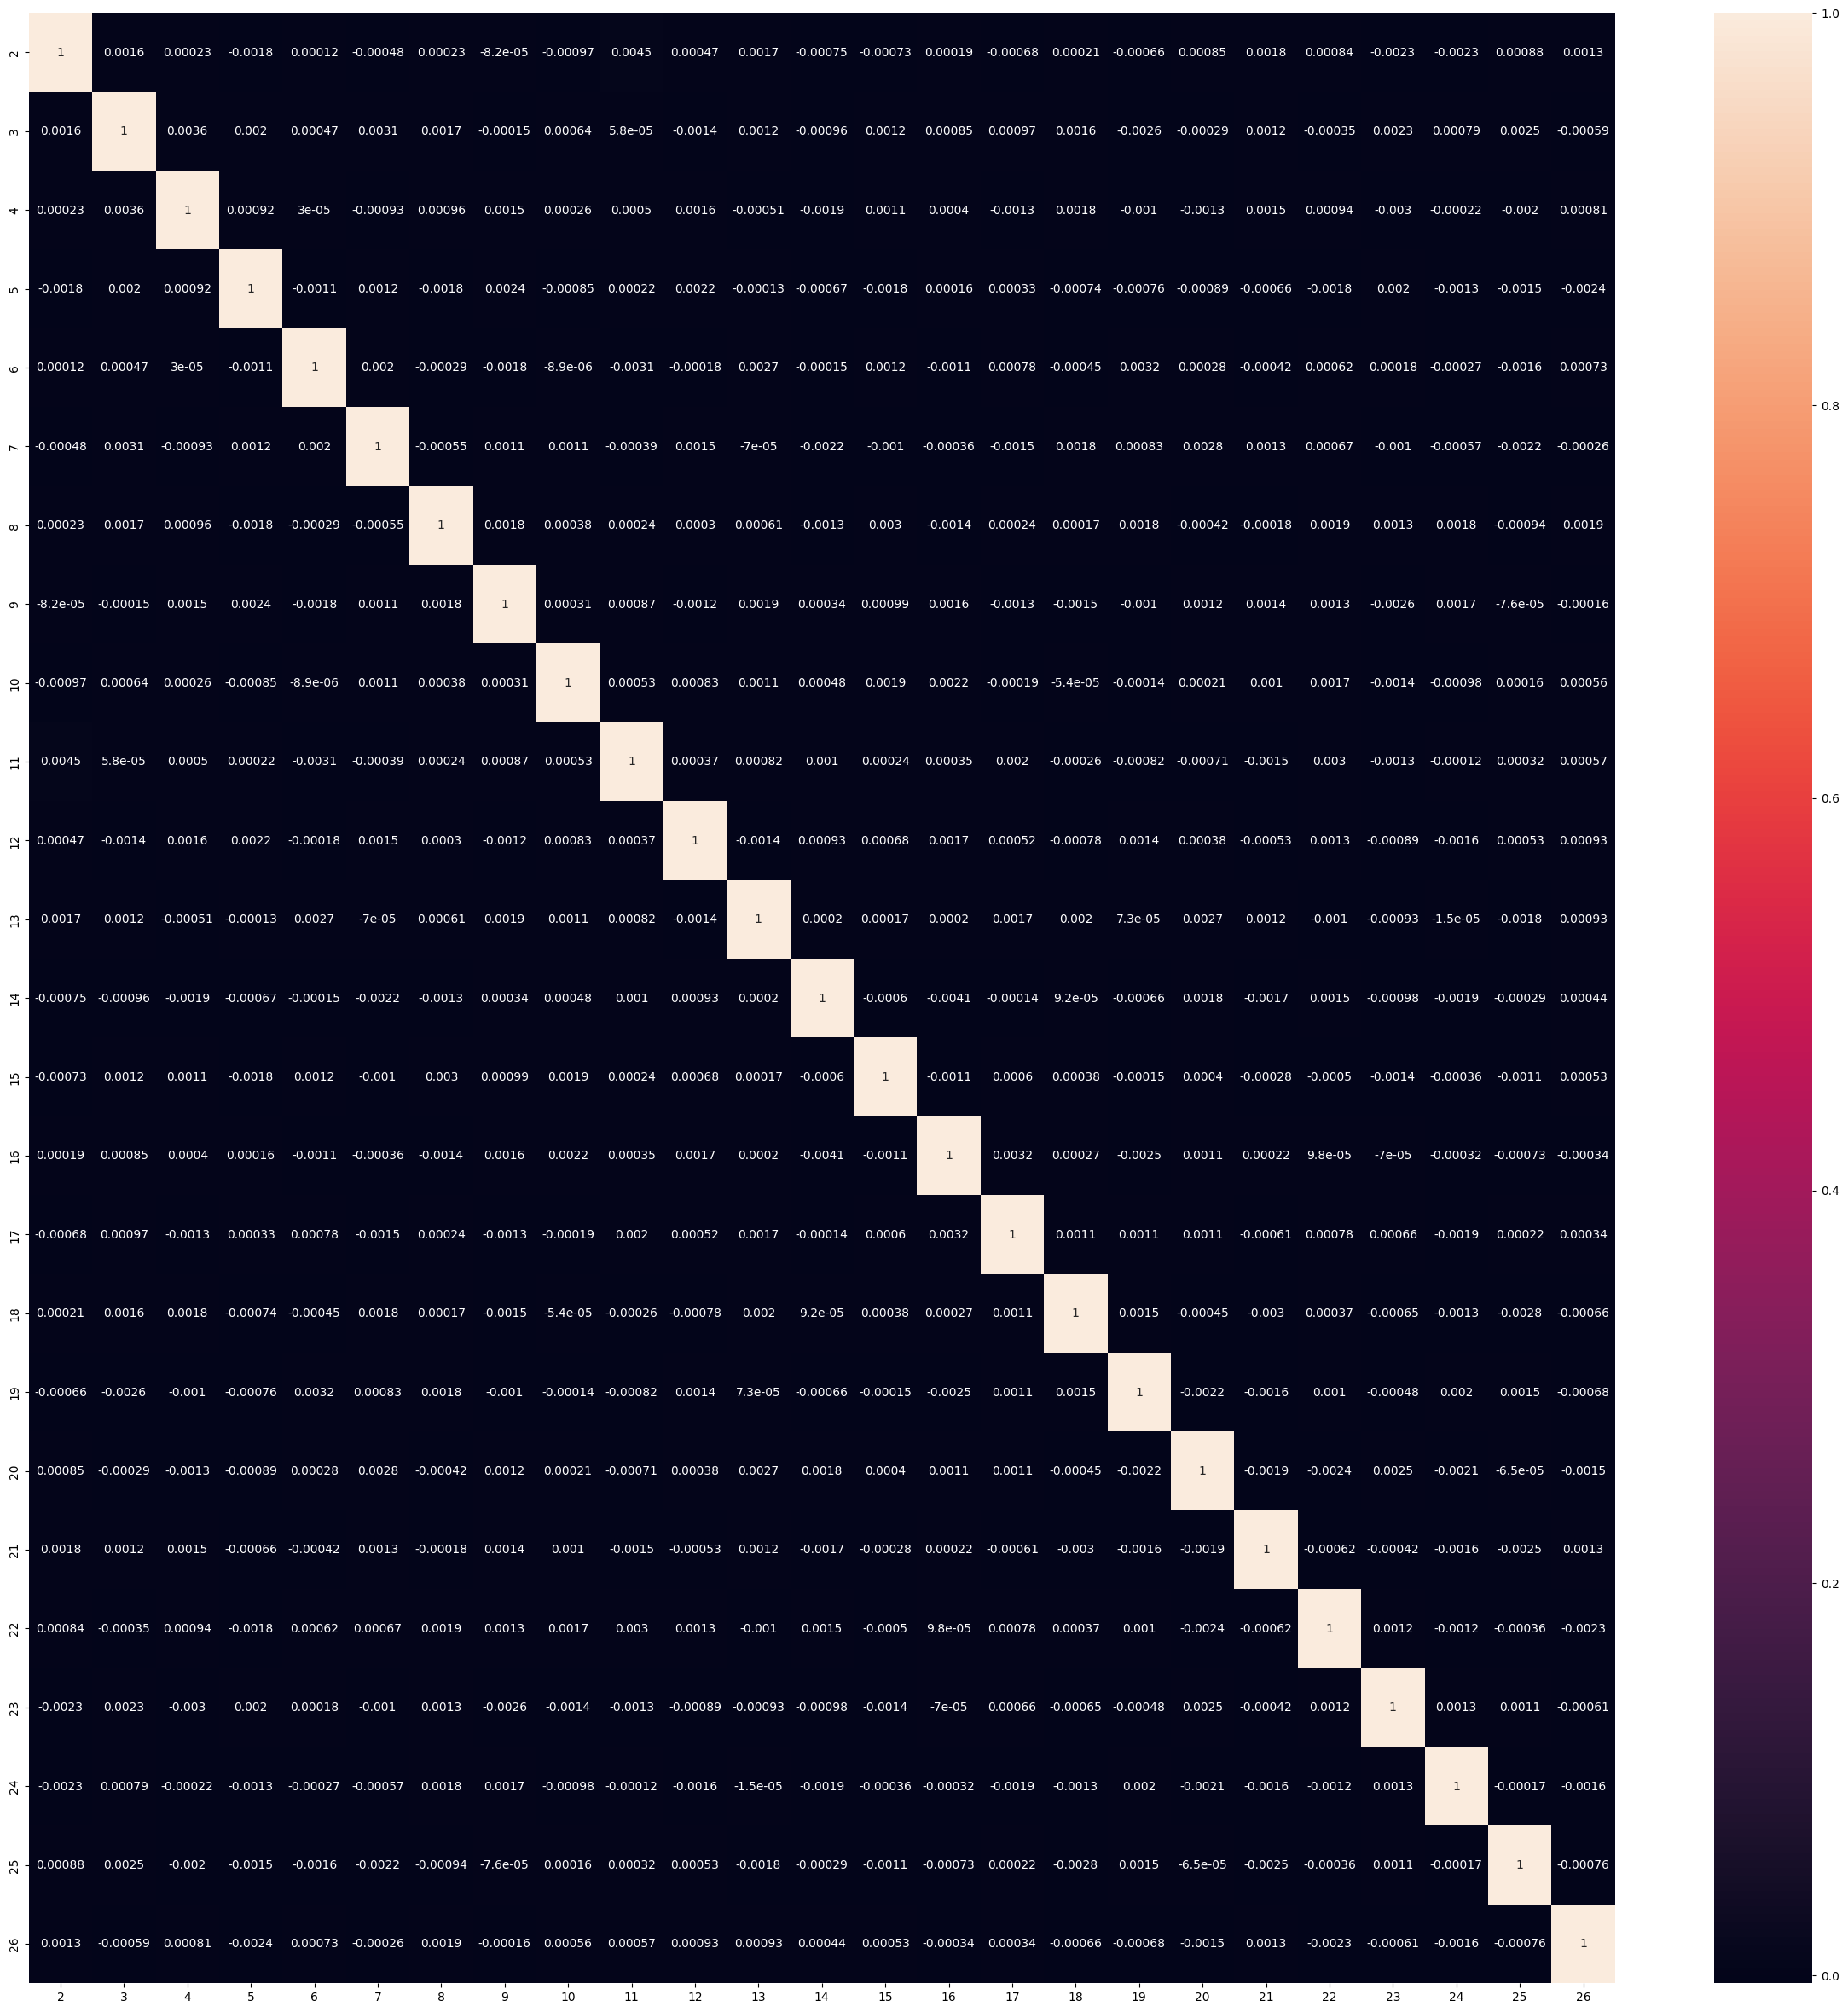

In [ ]:
plt.figure(figsize=(30,30))
ax=sns.heatmap(data=df.iloc[:,2:27].corr(method='pearson'),annot=True)

In [ ]:
pd.set_option('display.max_columns',None)
df1=df.iloc[:,2:27].apply(pd.Series.value_counts, bins=np.arange(start=0,stop=1.01,step=0.1))
sum=df1.sum(axis=1)
df1['27']=sum
df1

2      3      4      5      6      7      8      9     10  \
(-0.001, 0.1]  50240  49574  49931  50231  49814  49793  50230  50093  49800   
(0.1, 0.2]     49951  49979  50293  49818  49851  49910  50049  50134  49951   
(0.2, 0.3]     49861  50182  50141  49786  49979  50096  49991  49998  50576   
(0.3, 0.4]     50169  50458  49688  50051  50191  49932  49977  49884  50140   
(0.4, 0.5]     49977  49957  49738  49883  50145  50015  49986  50223  49747   
(0.5, 0.6]     50267  49634  49797  50141  49986  50057  49958  49794  50067   
(0.6, 0.7]     49872  50115  50384  50471  49978  49927  49913  50024  50117   
(0.7, 0.8]     49811  49943  50241  49876  50096  49998  49632  50194  50043   
(0.8, 0.9]     49918  50010  49958  49977  49687  50131  50376  49859  49603   
(0.9, 1.0]     49934  50148  49829  49766  50273  50141  49888  49797  49956   

                  11     12     13     14     15     16     17     18     19  \
(-0.001, 0.1]  50135  50145  49602  49882  50239  50236  50071  49450  50238   
(0.1, 0.2]     49846  50045  49833  49736  49838  50330  49674  49721  49797   
(0.2, 0.3]     50207  50171  50123  50715  50472  50151  50334  50062  50015   
(0.3, 0.4]     49735  49879  49766  50150  49658  49977  50101  50272  49596   
(0.4, 0.5]     49738  49941  49703  49446  49518  50014  49968  50263  50057   
(0.5, 0.6]     49994  49773  50309  49918  50182  50239  49816  50303  49702   
(0.6, 0.7]     49744  50020  50172  49995  49711  50038  49904  50055  50187   
(0.7, 0.8]     50170  50048  50222  50153  50107  49669  50016  49723  50256   
(0.8, 0.9]     50387  50140  50263  50410  50413  49699  50169  50048  50166   
(0.9, 1.0]     50044  49838  50007  49595  49862  49647  49947  50103  49986   

                  20     21     22     23     24     25     26       27  
(-0.001, 0.1]  50249  49877  49843  49864  49583  49949  49789  1248858  
(0.1, 0.2]     50003  49918  49903  50135  50082  49980  49629  1248406  
(0.2, 0.3]     49696  49972  50027  50278  50303  50193  50026  1253355  
(0.3, 0.4]     49833  49822  50186  49920  50531  49891  49983  1249790  
(0.4, 0.5]     49810  50258  49968  49762  50014  49881  50037  1248049  
(0.5, 0.6]     50045  50204  50508  49809  50064  50309  49986  1250862  
(0.6, 0.7]     50275  49965  49944  50209  49768  49743  50468  1250999  
(0.7, 0.8]     50002  49643  50050  50320  49713  49957  50165  1250048  
(0.8, 0.9]     49870  49996  49919  49654  49909  50032  50152  1250746  
(0.9, 1.0]     50217  50345  49652  50049  50033  50065  49765  1248887

In [ ]:
df.iloc[:,2:].describe()

2              3              4              5   \
count  500000.000000  500000.000000  500000.000000  500000.000000   
mean        0.499646       0.500296       0.499995       0.500033   
std         0.288652       0.288496       0.288808       0.288599   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.249900       0.250800       0.249400       0.250400   
50%         0.499600       0.499700       0.500400       0.500500   
75%         0.749400       0.750300       0.749925       0.749600   
max         1.000000       1.000000       1.000000       1.000000   

                  6              7              8              9   \
count  500000.000000  500000.000000  500000.000000  500000.000000   
mean        0.500318       0.500491       0.499761       0.499674   
std         0.288603       0.288693       0.288808       0.288567   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.250900       0.250700       0.249700       0.249600   
50%         0.500100       0.500600       0.499600       0.499500   
75%         0.749800       0.750600       0.749900       0.749600   
max         1.000000       1.000000       1.000000       1.000000   

                  10             11             12             13  \
count  500000.000000  500000.000000  500000.000000  500000.000000   
mean        0.499733       0.500416       0.499789       0.500921   
std         0.288454       0.288928       0.288885       0.288503   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.249900       0.249800       0.249100       0.251200   
50%         0.499600       0.500800       0.499700       0.502000   
75%         0.749100       0.751000       0.750300       0.750600   
max         1.000000       1.000000       1.000000       1.000000   

                  14             15             16             17  \
count  500000.000000  500000.000000  500000.000000  500000.000000   
mean        0.499951       0.499909       0.498842       0.500060   
std         0.288565       0.288930       0.288516       0.288754   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.249900       0.249200       0.248500       0.250300   
50%         0.500200       0.500600       0.498600       0.499750   
75%         0.750200       0.750800       0.748100       0.750500   
max         1.000000       1.000000       1.000000       1.000000   

                  18             19             20             21  \
count  500000.000000  500000.000000  500000.000000  500000.000000   
mean        0.500664       0.500395       0.500221       0.500455   
std         0.288270       0.288906       0.288865       0.288643   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.251800       0.250000       0.249900       0.250600   
50%         0.500500       0.500600       0.500900       0.500300   
75%         0.750300       0.750900       0.750300       0.750500   
max         1.000000       1.000000       1.000000       1.000000   

                  22             23             24             25  \
count  500000.000000  500000.000000  500000.000000  500000.000000   
mean        0.499851       0.500049       0.499837       0.500127   
std         0.288304       0.288654       0.288483       0.288675   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.250100       0.249800       0.250500       0.250400   
50%         0.500200       0.500100       0.499000       0.500300   
75%         0.749400       0.749800       0.749400       0.750400   
max         1.000000       1.000000       1.000000       1.000000   

                  26  
count  500000.000000  
mean        0.500587  
std         0.288442  
min         0.000000  
25%         0.251000  
50%         0.501100  
75%         0.750000  
max         1.000000

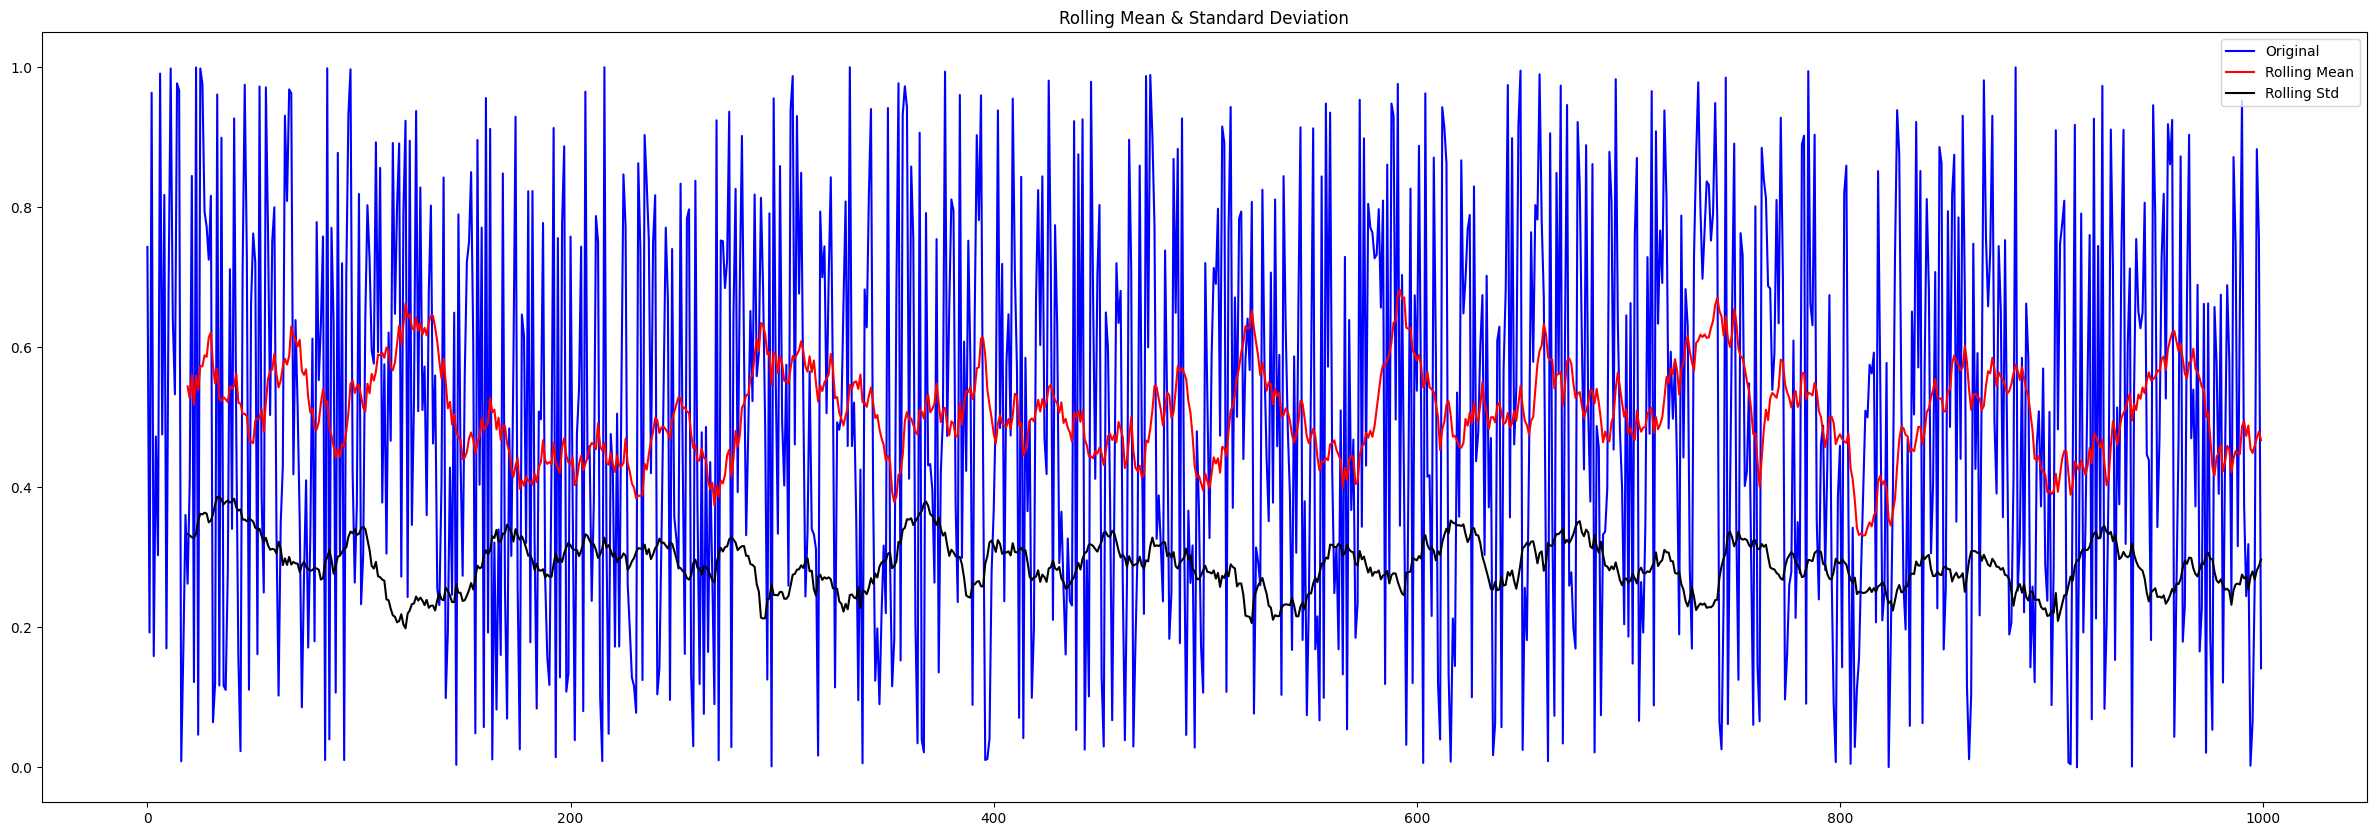

Results of Dickey-Fuller Test:
Test Statistic                 -31.313249
p-value                          0.000000
#Lags Used                       0.000000
Number of Observations Used    999.000000
Critical Value (1%)             -3.436913
Critical Value (5%)             -2.864437
Critical Value (10%)            -2.568313
dtype: float64


In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window=20).mean()
    rolstd = timeseries.rolling(window=20).std()

    #Plot rolling statistics:
    plt.figure(figsize=(30,10))
    # plt.yscale('log')
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

test_stationarity(df[:1000][3])

In [ ]:
from statsmodels.tsa.stattools import adfuller

print ('Results of Dickey-Fuller Test:')
dftest = adfuller(df.iloc[:10001,3], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   -98.297073
p-value                            0.000000
#Lags Used                         0.000000
Number of Observations Used    10000.000000
Critical Value (1%)               -3.431004
Critical Value (5%)               -2.861829
Critical Value (10%)              -2.566924
dtype: float64


In [ ]:
dflog=pd.DataFrame(np.log(df))

/usr/local/lib/python3.9/dist-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


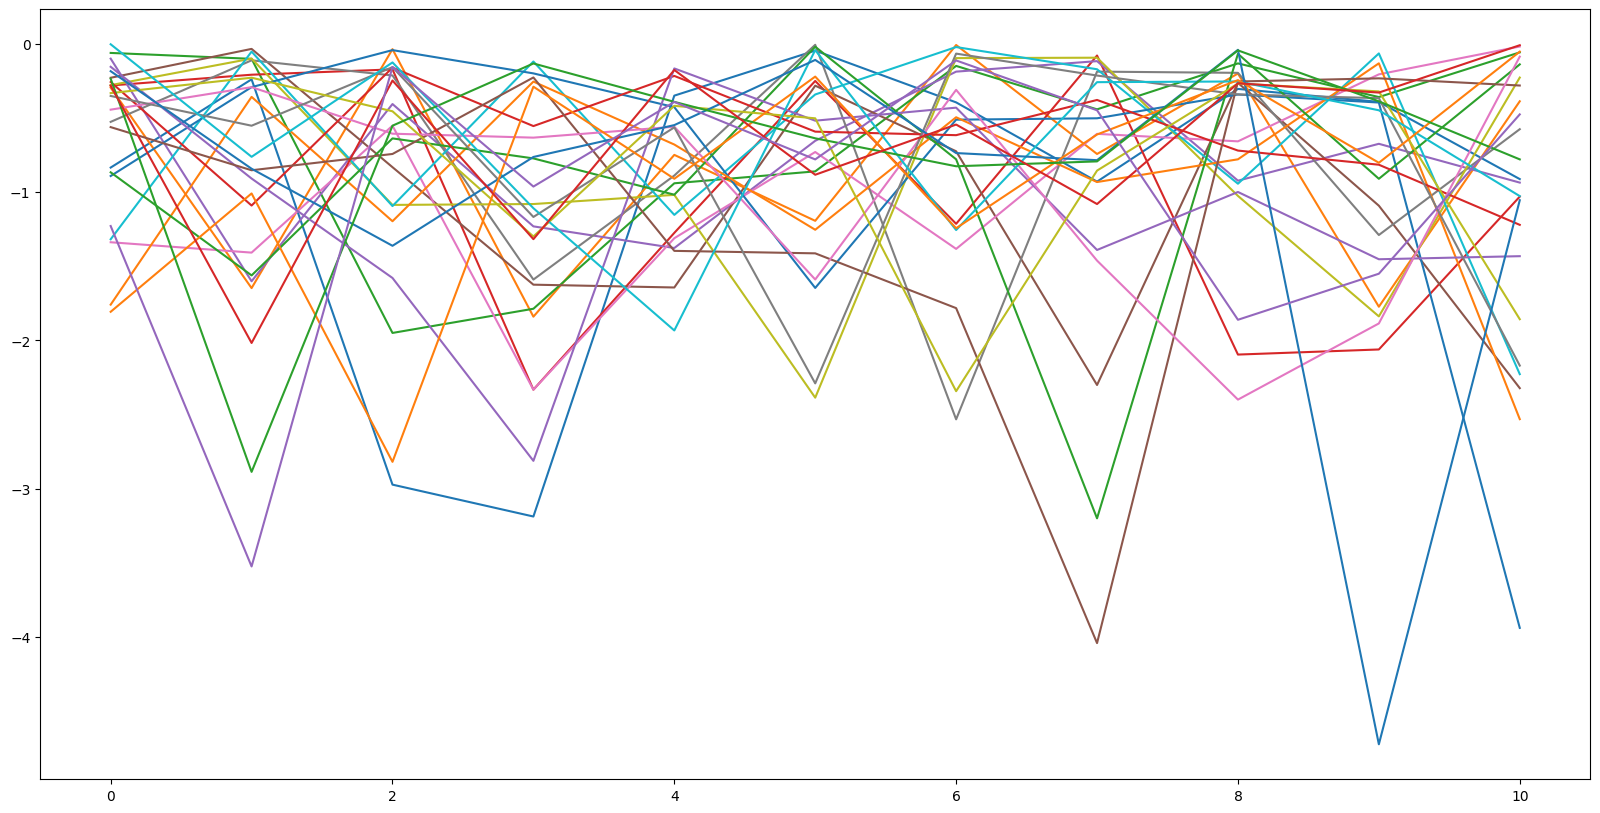

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(dflog.iloc[:11,2:])

In [ ]:
df.iloc[:,3]

0         0.7431
1         0.1925
2         0.9633
3         0.1588
4         0.4724
           ...  
499995    0.9308
499996    0.6392
499997    0.7094
499998    0.4717
499999    0.2163
Name: 3, Length: 500000, dtype: float64

In [ ]:
result = adfuller(df.iloc[:10000,3], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -98.2975111584353
n_lags: 0.0
p-value: 0.0
Critial Values:
   1%, -3.4310041633725734
Critial Values:
   5%, -2.861829101294412
Critial Values:
   10%, -2.566923883481157


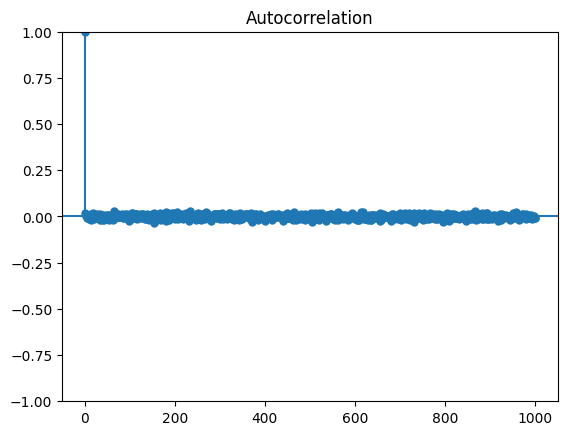

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
acf=plot_acf(df.iloc[:10000,3],lags=1000)

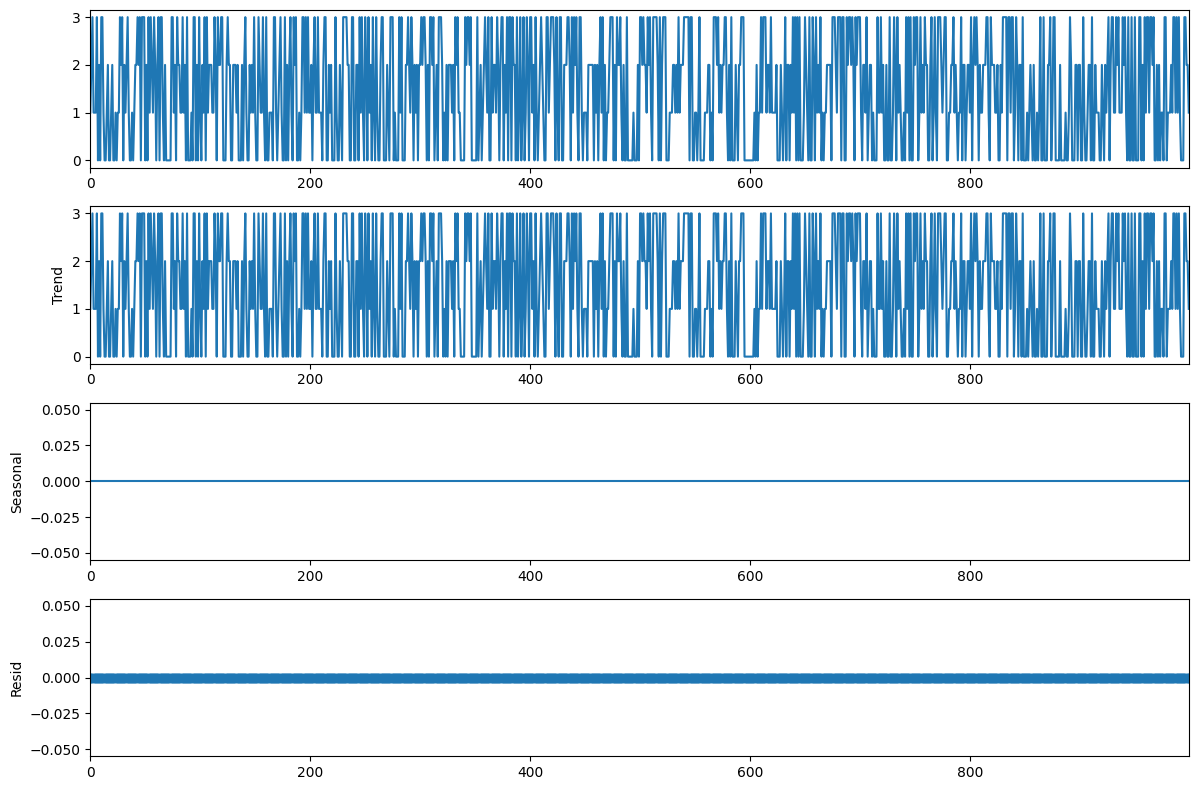

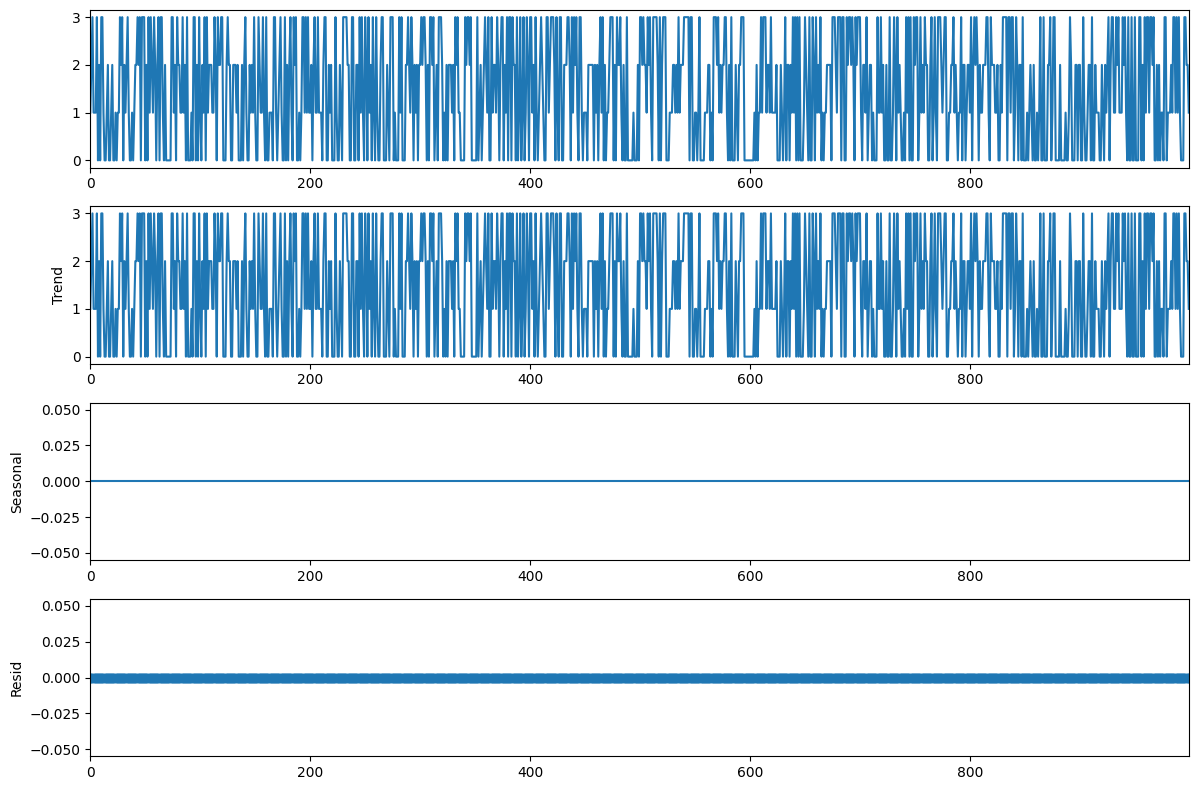

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

plt.rcParams['figure.figsize'] = 12, 8

# Decompose and plot
decomposed = seasonal_decompose(out[:1000], model='additive',period=1)

decomposed.plot()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
df1=pd.DataFrame(df.iloc[:10000,3])
# 1,1,2 ARIMA Model
model = ARIMA(df1.iloc[:5000], order=(0,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      3   No. Observations:                 5000
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -922.037
Date:                Fri, 07 Apr 2023   AIC                           1848.073
Time:                        16:47:47   BIC                           1861.107
Sample:                             0   HQIC                          1852.642
                               - 5000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000      0.031    -32.295      0.000      -1.061      -0.939
sigma2         0.0845      0.004     22.407      0.000       0.077       0.092
Ljung-Box (L1) (Q):                   2.56   Jarque-

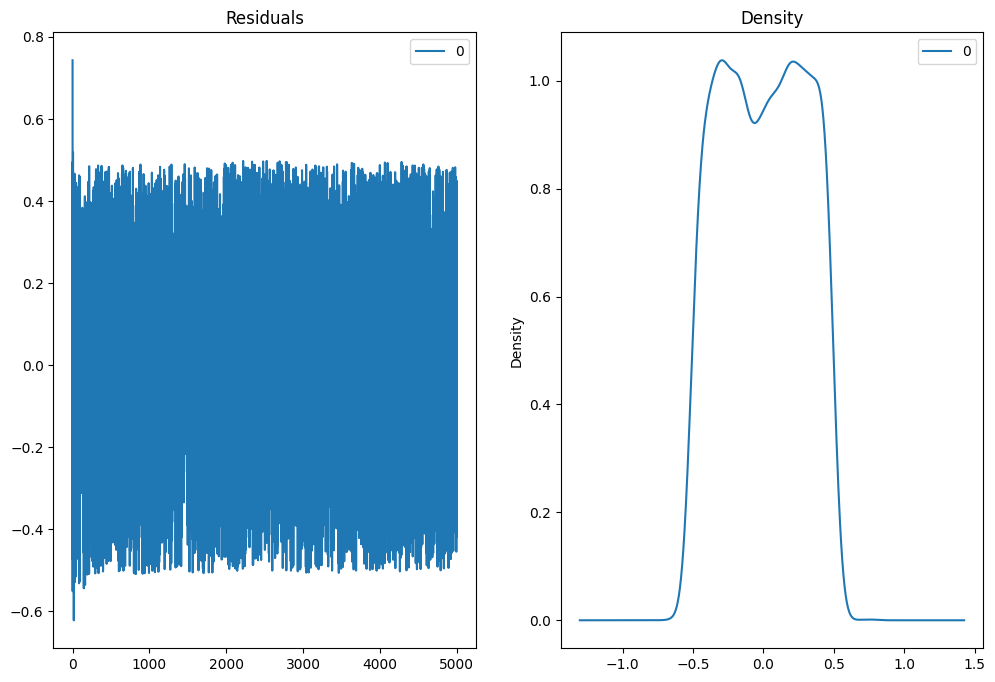

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


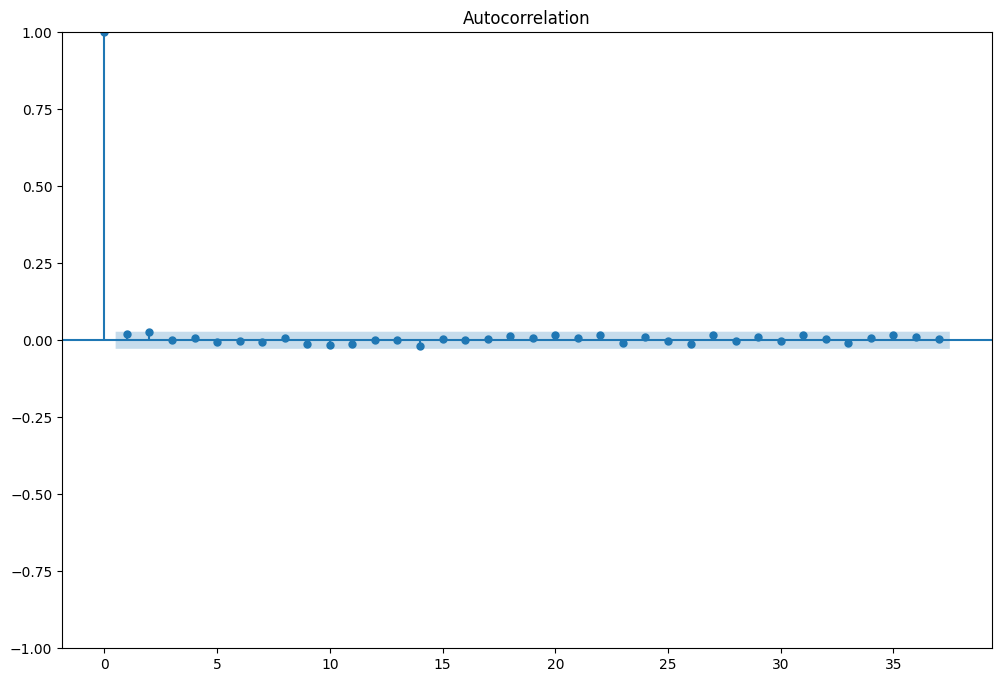

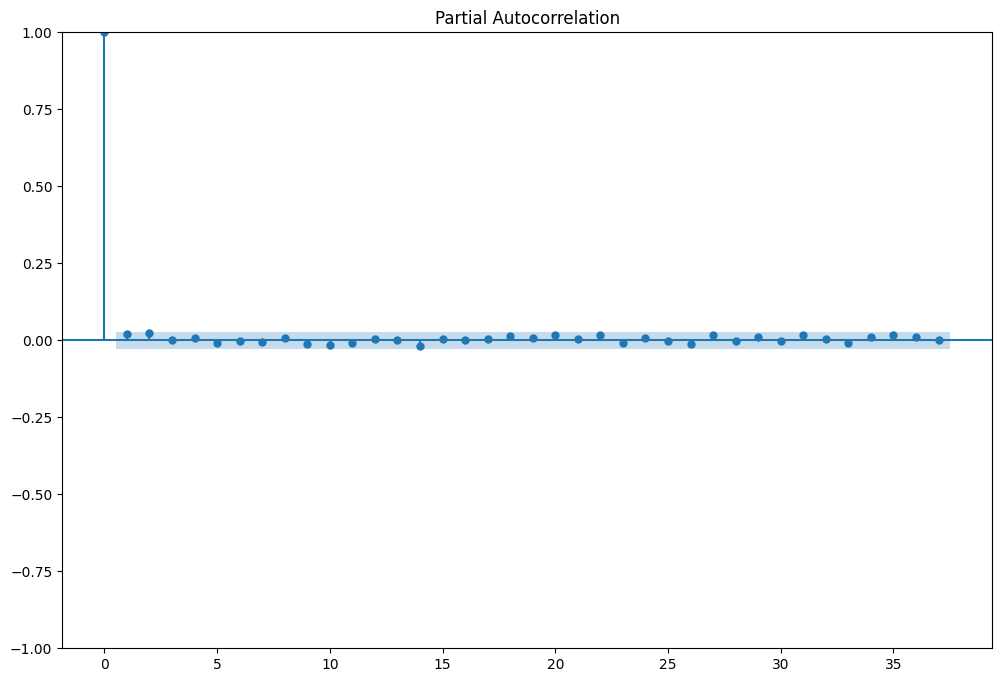

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf_res = plot_acf(residuals)

pacf_res = plot_pacf(residuals)

<Axes: >

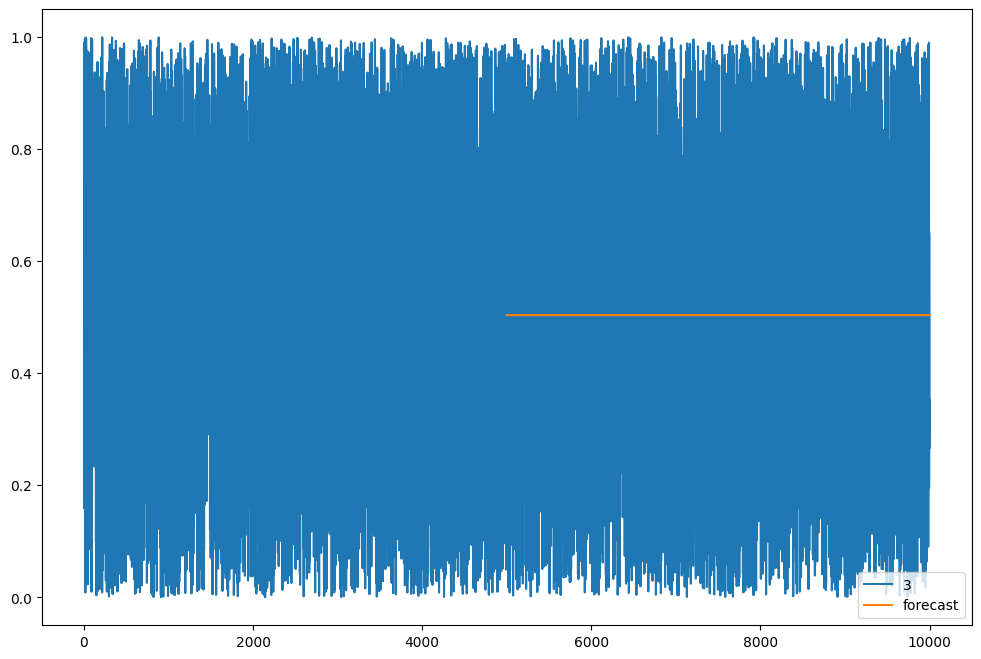

In [ ]:
# df1=pd.DataFrame(df.iloc[:2000,3])
forecast_test = model_fit.forecast(5000)

df1['forecast'] = forecast_test

df1.plot()

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='3'>)

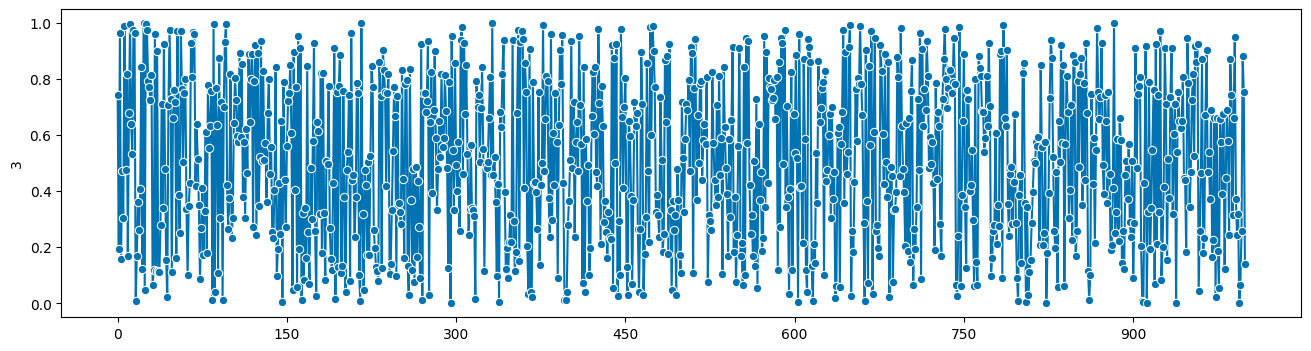

In [ ]:
from sktime.utils.plotting import plot_series

# in the example, we use the airline data set.
y = df.iloc[:1000,3]
plot_series(y)



In [ ]:
from sktime.forecasting.naive import NaiveForecaster

forecaster = NaiveForecaster(strategy="last",sp=100)


forecaster.fit(y)

NaiveForecaster(sp=100)

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='3'>)

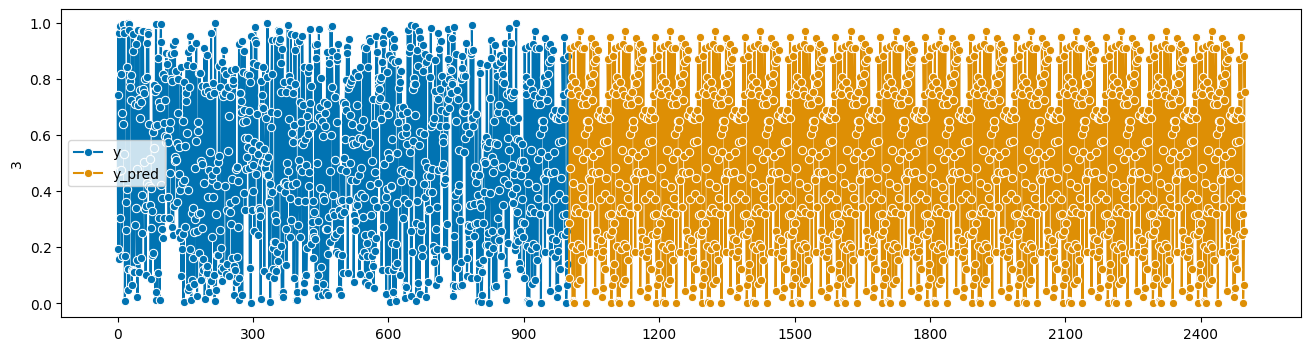

In [ ]:

y_pred = forecaster.predict(np.arange(1,1500,1))

# plotting predictions and past data
plot_series(y, y_pred, labels=["y", "y_pred"])



8 2


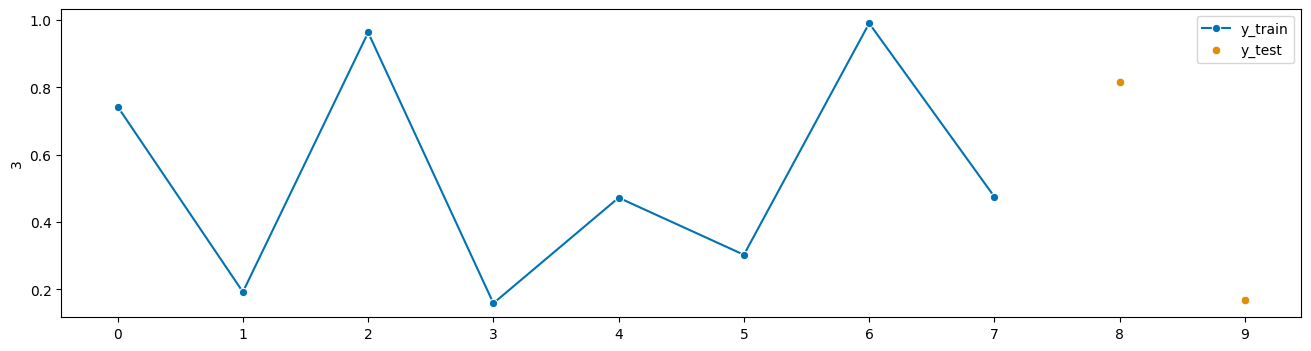

In [ ]:
from sktime.forecasting.model_selection import temporal_train_test_split

y = df.iloc[:10,3]
y_train, y_test = temporal_train_test_split(y, test_size=2)
# we will try to forecast y_test from y_train

# plotting for illustration
plot_series(y_train, y_test, labels=["y_train", "y_test"])
print(y_train.shape[0], y_test.shape[0])



(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='3'>)

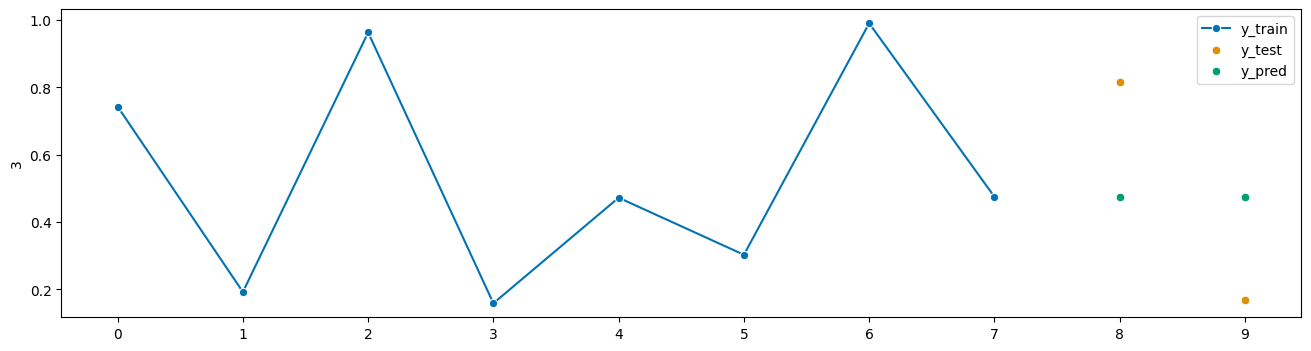

In [ ]:
from sktime.forecasting.naive import ForecastingHorizon
fh = ForecastingHorizon(y_test.index, is_relative=False)

forecaster = NaiveForecaster(strategy="last", sp=1)

forecaster.fit(y_train)

# y_pred will contain the predictions
y_pred = forecaster.predict(fh)

# plotting for illustration
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])

In [ ]:
sklearn.metrics.mean_squared_error(y_test,y_pred)

0.10518133

/usr/local/lib/python3.9/dist-packages/sktime/utils/plotting.py:113: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, figsize=plt.figaspect(0.25))


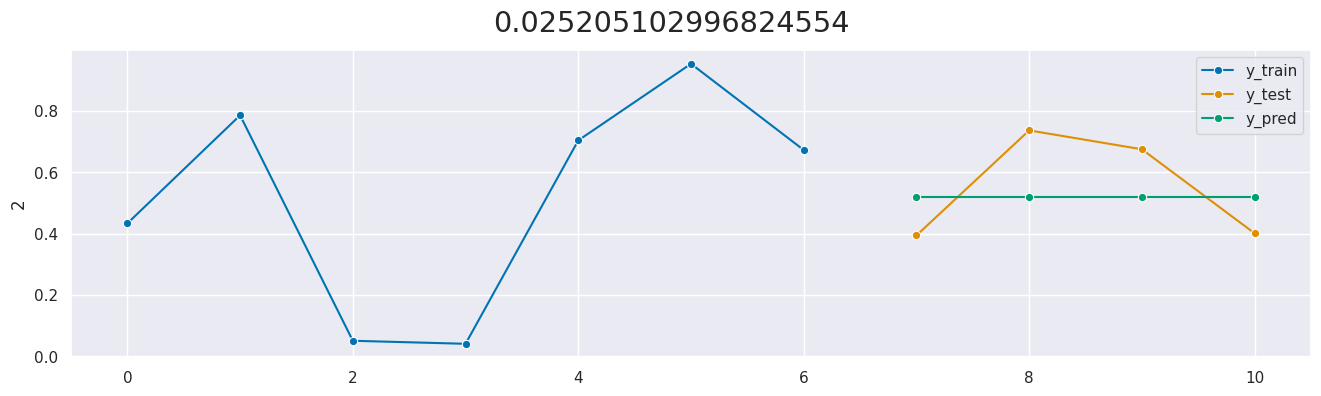

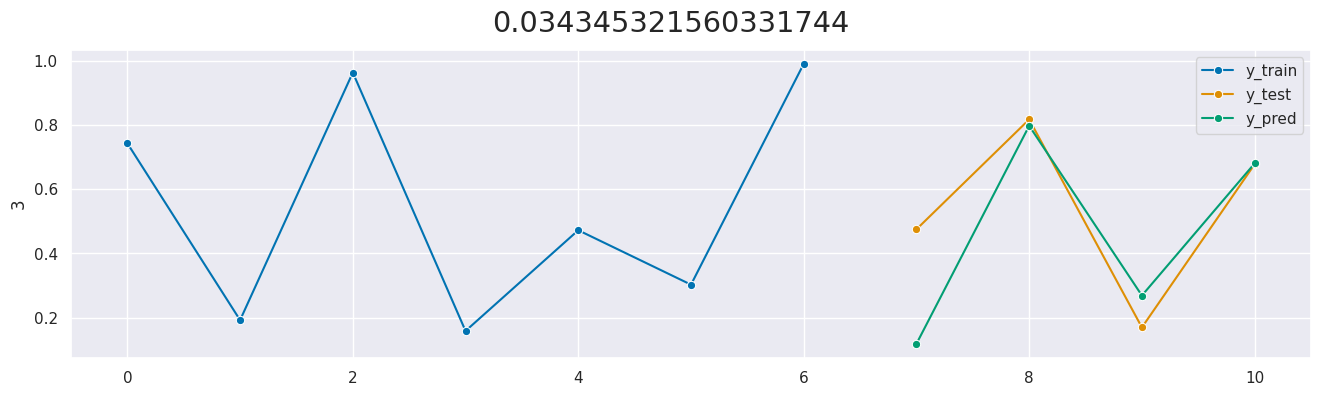

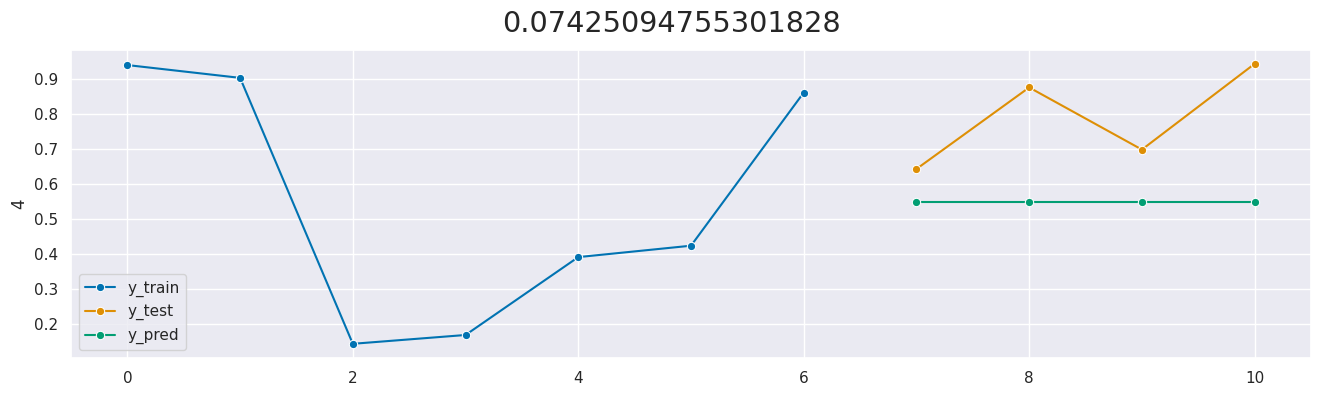

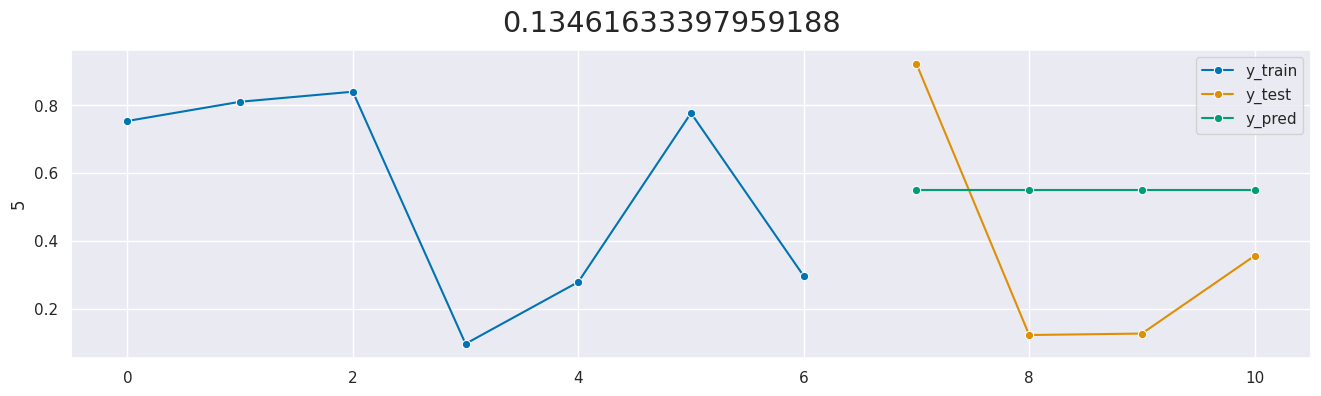

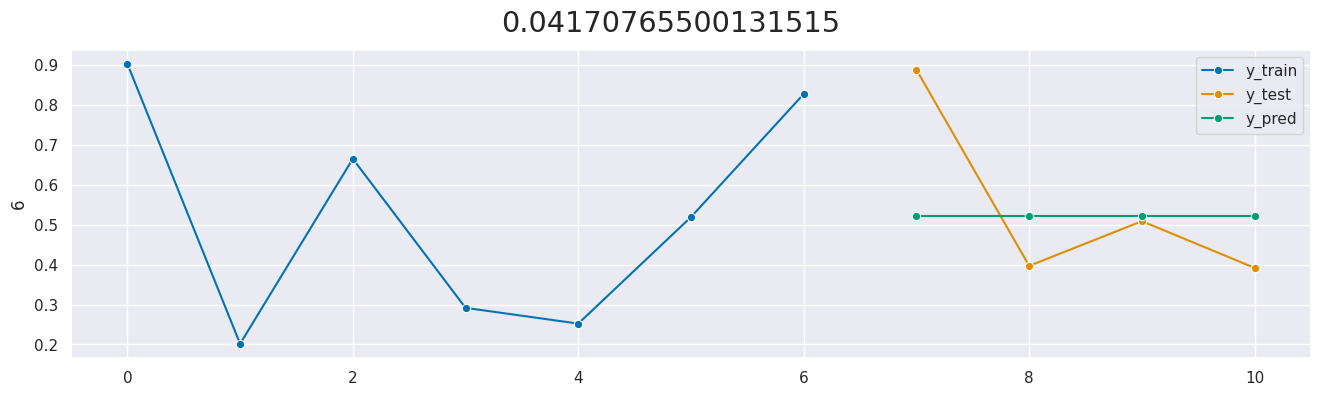

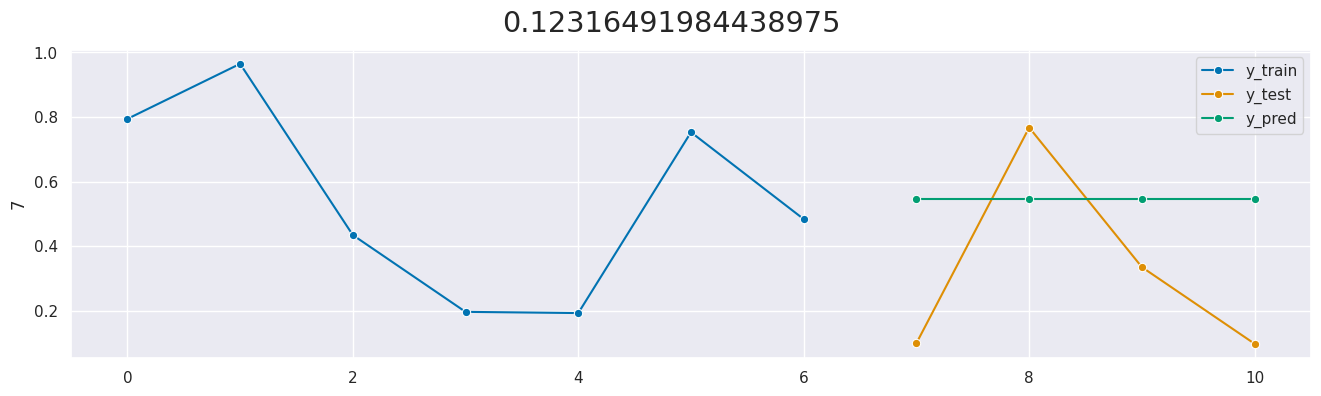

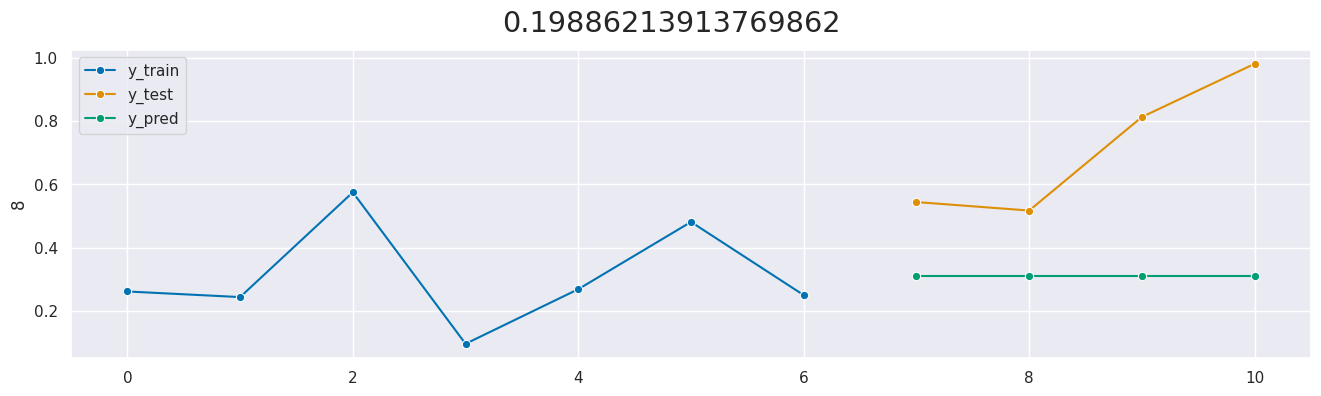

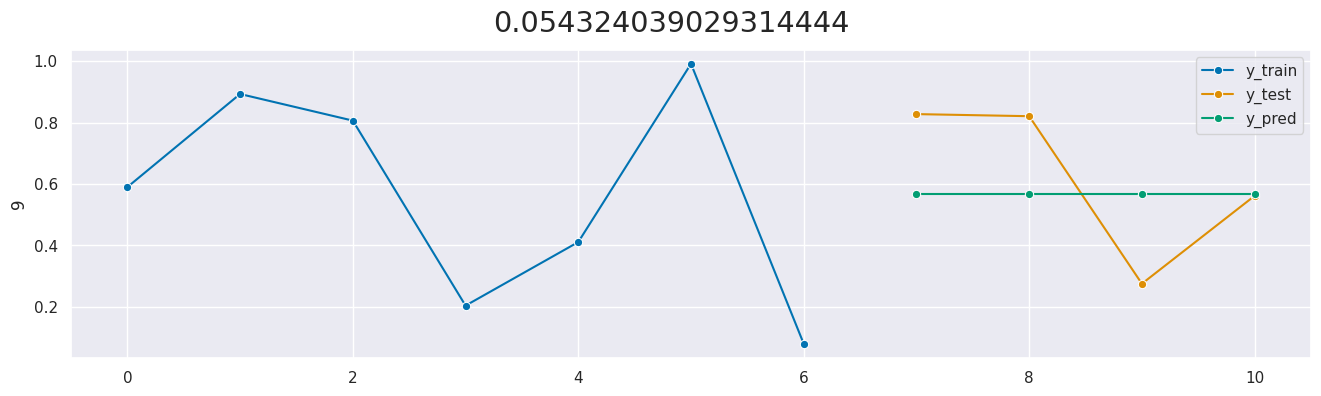

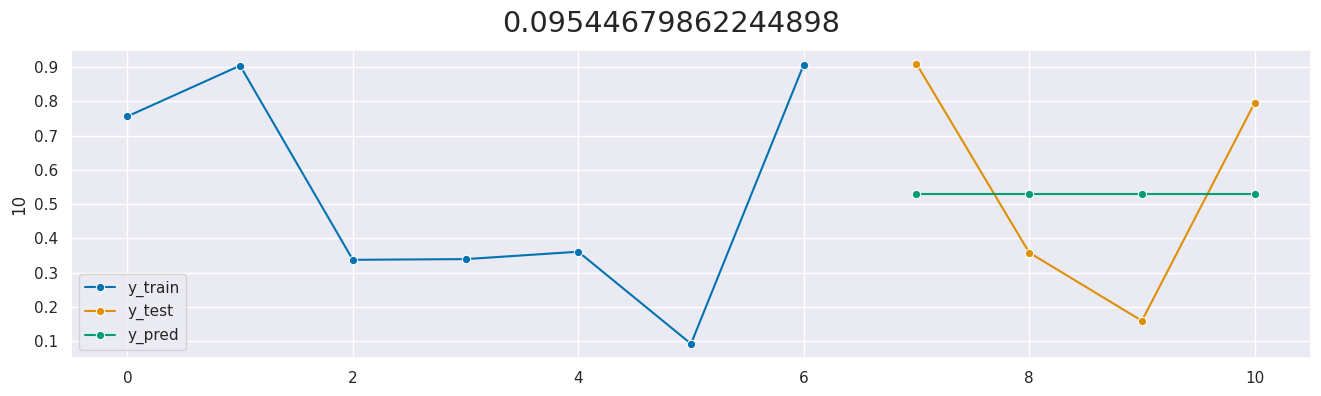

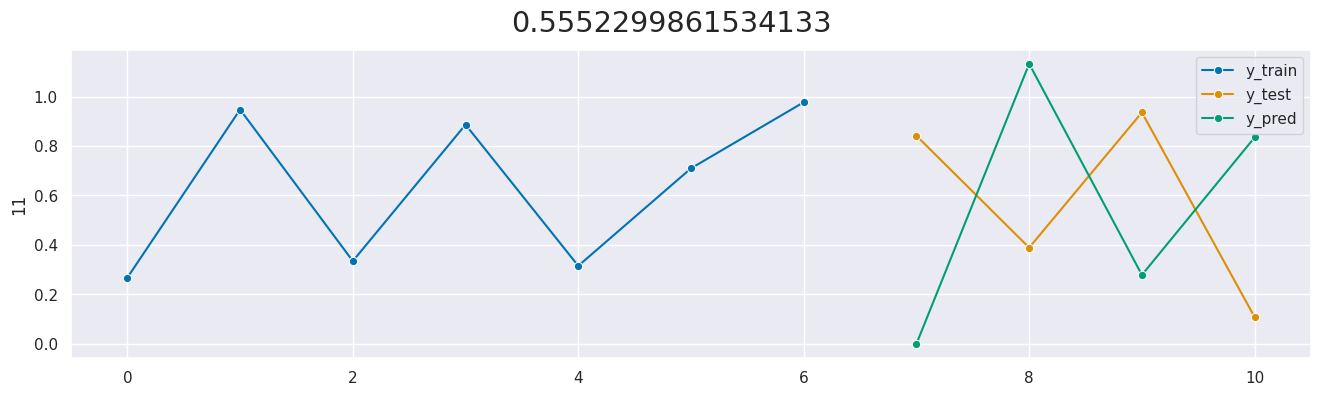

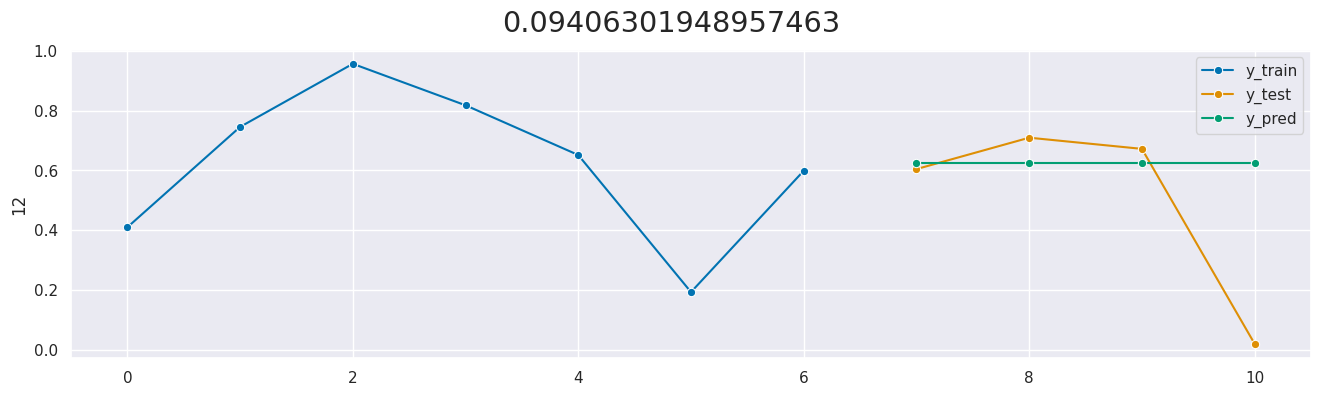

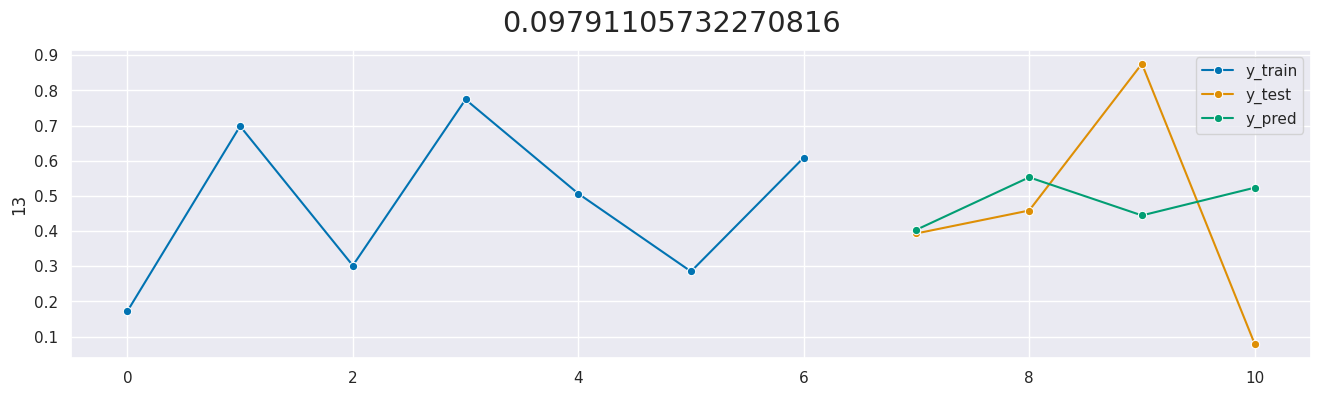

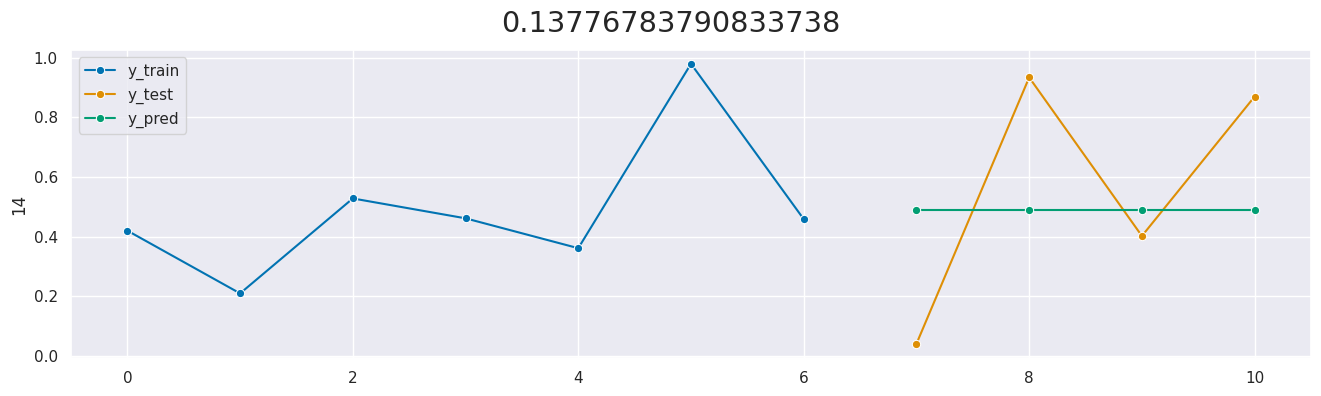

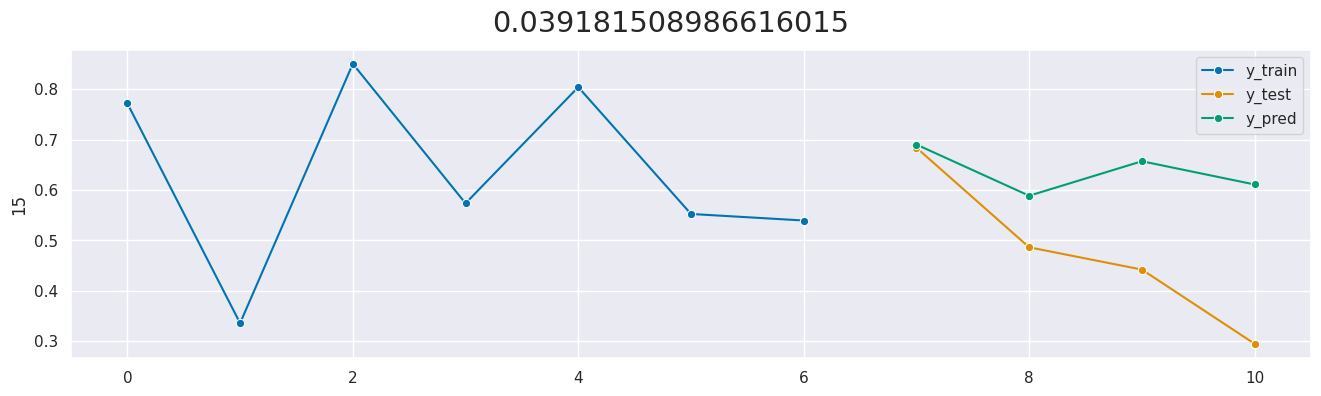

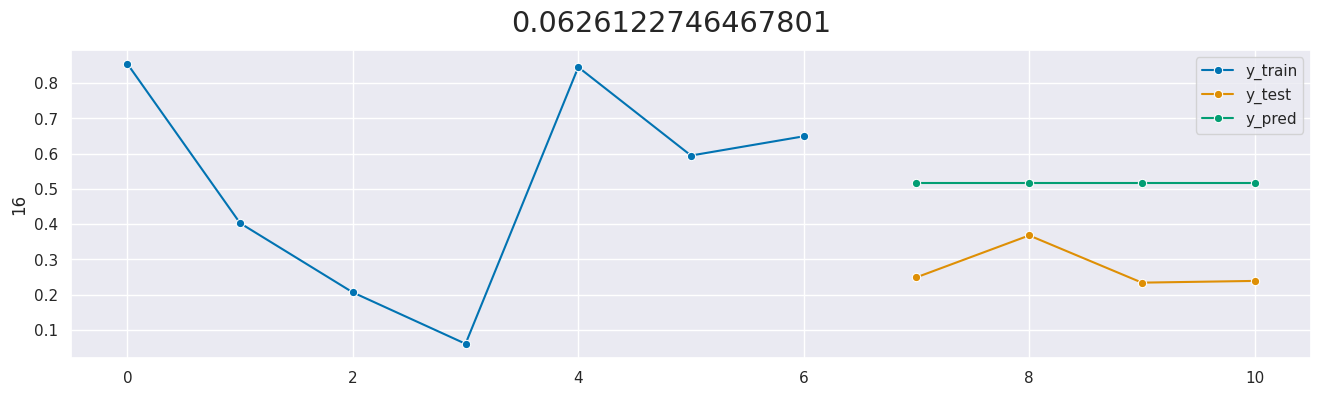

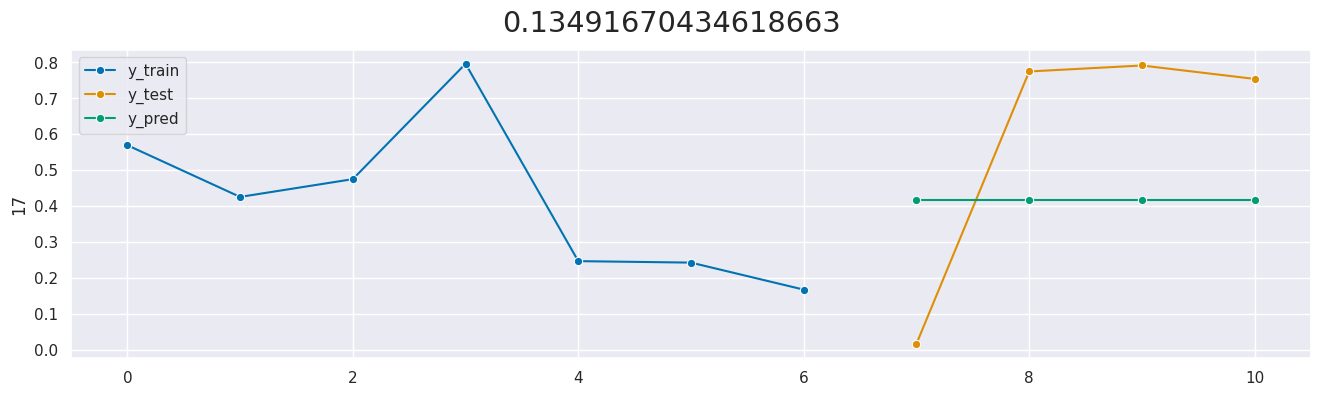

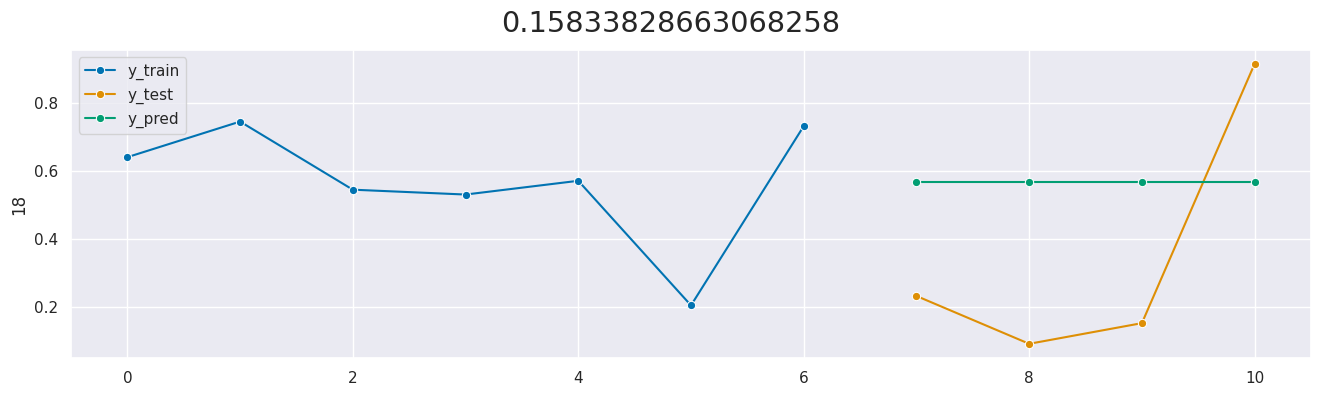

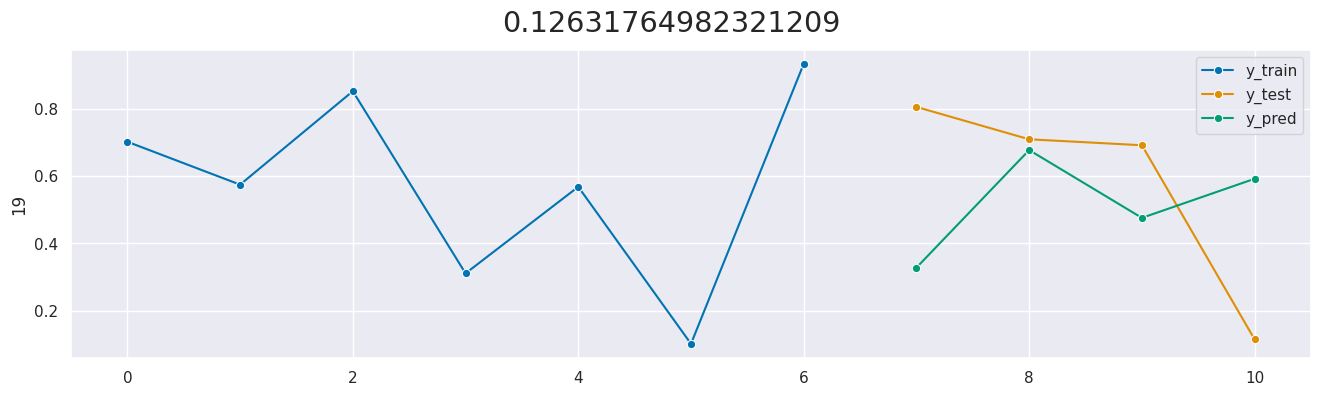

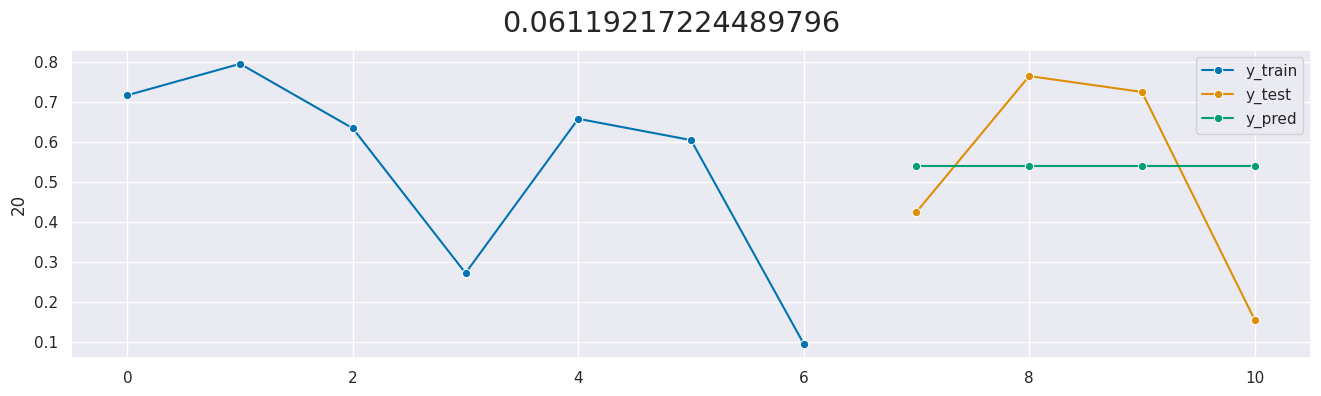

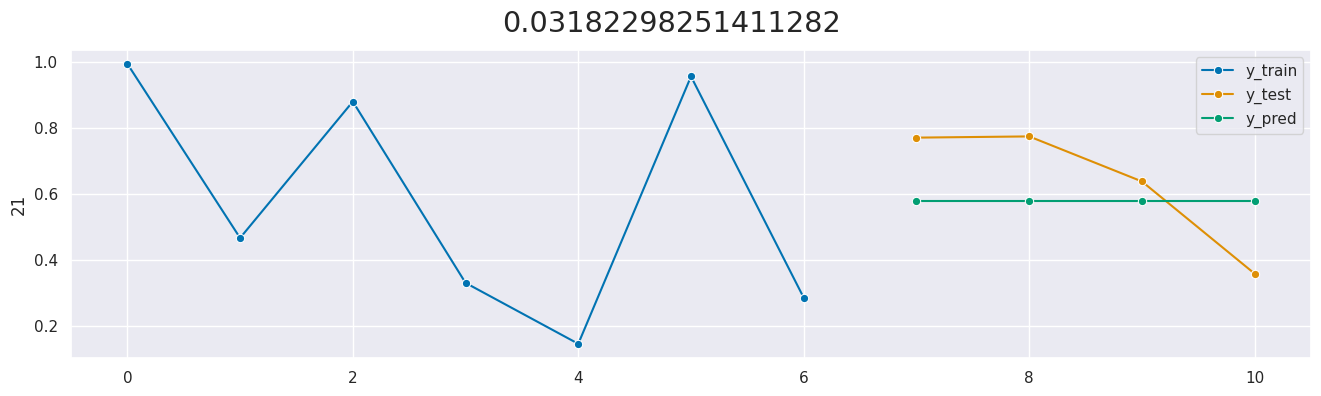

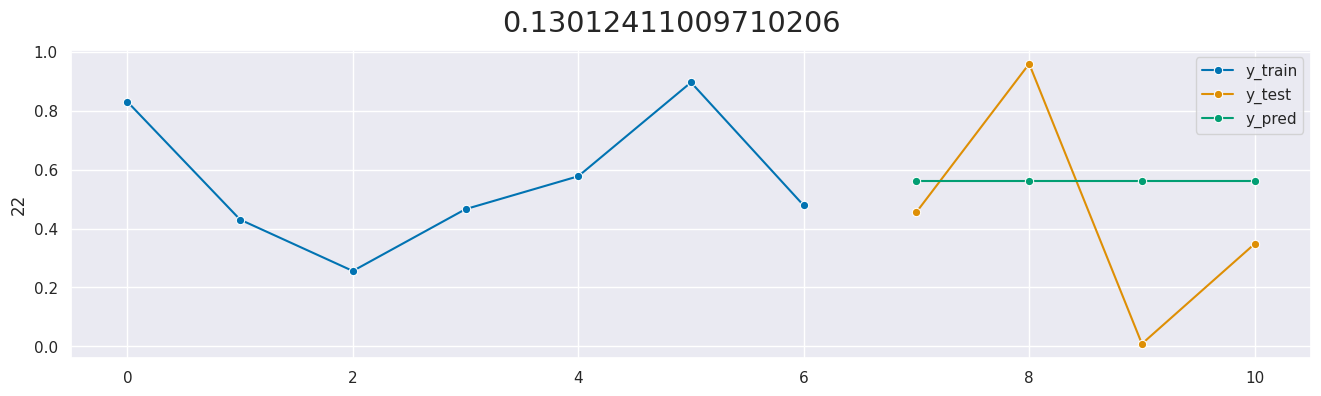

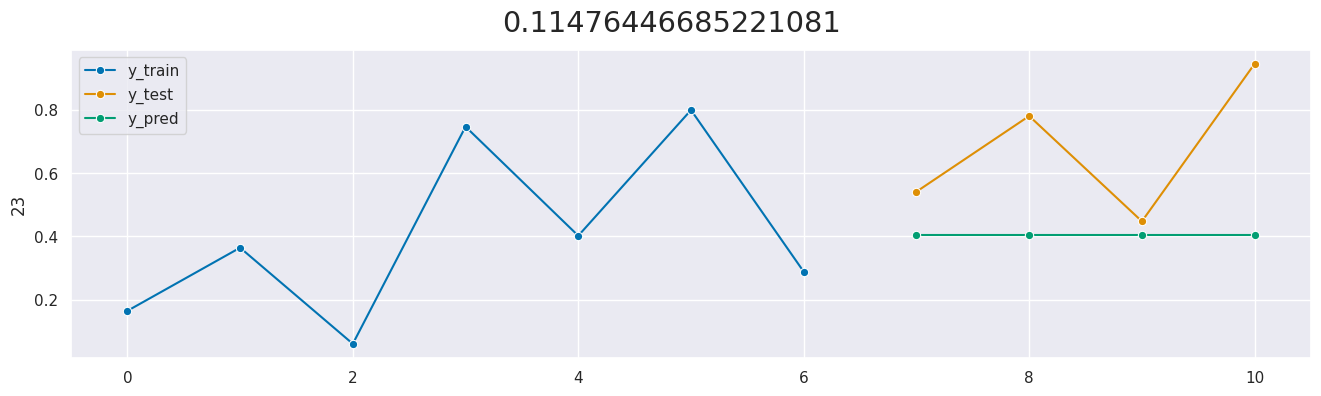

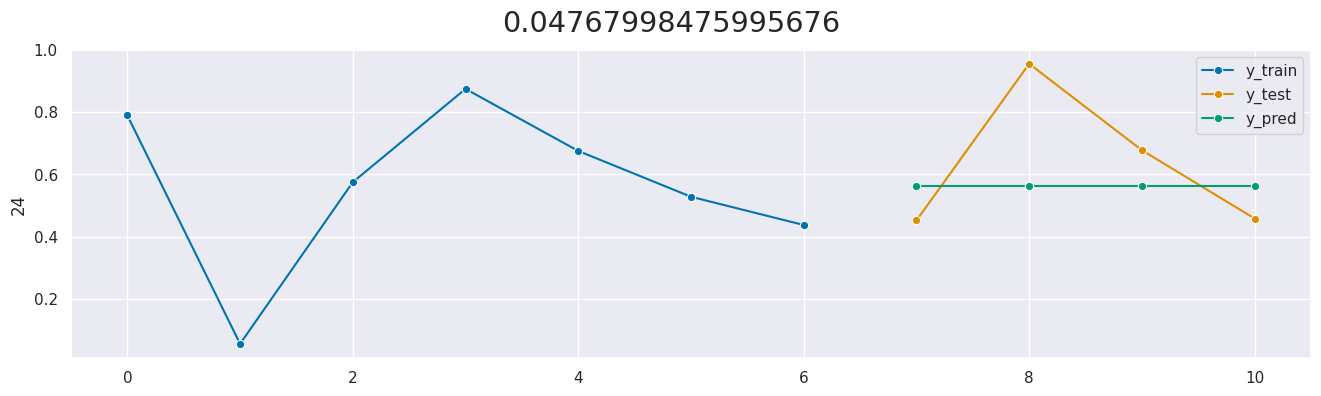

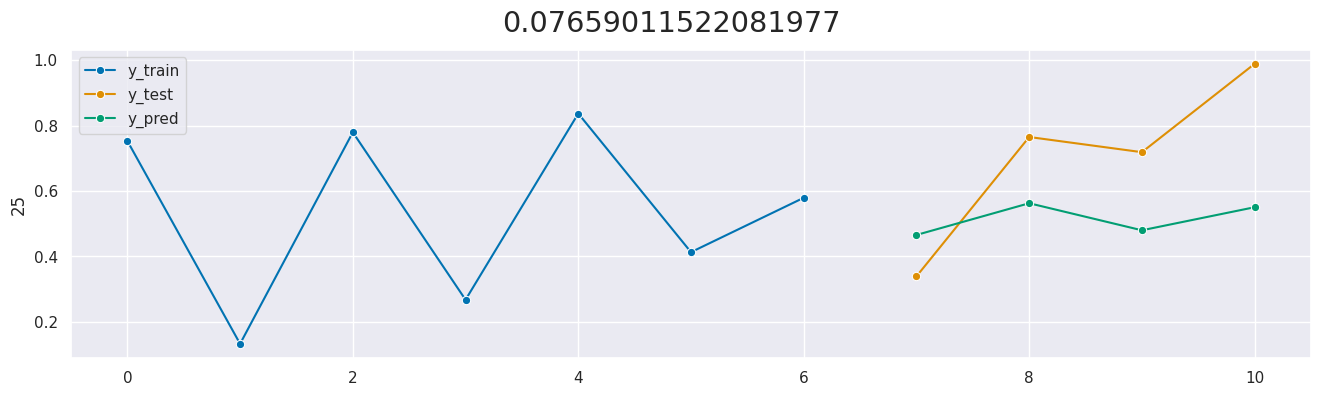

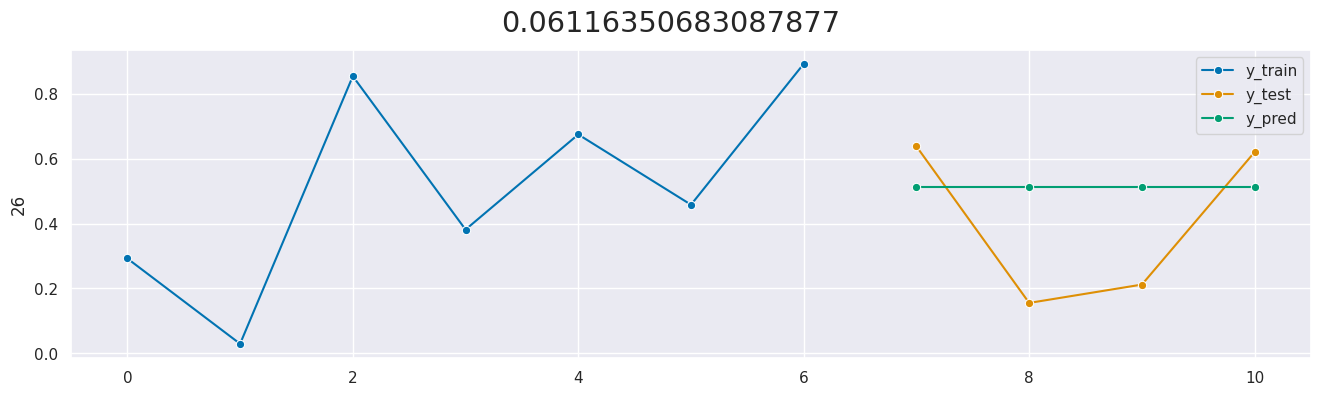

In [ ]:
from sktime.forecasting.arima import AutoARIMA
import seaborn as sns
sns.set(rc={'figure.figsize':(12,6)})
for x in range(25):
  y = df.iloc[:11,x+2]
  y_train, y_test = temporal_train_test_split(y, test_size=4)
  fh_abs = ForecastingHorizon(y_test.index, is_relative=False)

  forecaster = AutoARIMA(start_p=1, d=None, start_q=1, max_p=10, max_d=10, max_q=10, start_P=1, D=None, start_Q=1, max_P=10, max_D=10, max_Q=10, max_order=10, sp=1,stationary=True,suppress_warnings=True)
  forecaster.fit(y_train)
  y_pred = forecaster.predict(fh=fh_abs)
  x+=1
  plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"],title=sklearn.metrics.mean_squared_error(y_test,y_pred))
  # print(sklearn.metrics.mean_squared_error(y_test,y_pred))

In [ ]:
dfu

Sample_Id     x_1     x_2     x_3     x_4     x_5     x_6     x_7  \
0            0.0  0.4337  0.7431  0.9390  0.7541  0.9035  0.7943  0.2622   
1            1.0  0.4013  0.6779  0.9426  0.3566  0.3919  0.0981  0.9805   
2            2.0  0.8912  0.4076  0.8245  0.7026  0.7784  0.4193  0.0786   
3            3.0  0.4849  0.8162  0.7418  0.1640  0.0961  0.4293  0.2342   
4            4.0  0.2426  0.3405  0.9523  0.4741  0.9078  0.7081  0.7006   
...          ...     ...     ...     ...     ...     ...     ...     ...   
49995    49995.0  0.9557  0.8360  0.3574  0.7364  0.8689  0.5760  0.4967   
49996    49996.0  0.5495  0.1433  0.1085  0.5104  0.3456  0.4833  0.6988   
49997    49997.0  0.8030  0.7452  0.1653  0.8079  0.6092  0.5546  0.1920   
49998    49998.0  0.9413  0.7847  0.6995  0.0993  0.7468  0.4447  0.8650   
49999    49999.0  0.8533  0.3967  0.7594  0.9635  0.6024  0.8455  0.5864   

          x_8     x_9    x_10    x_11    x_12    x_13    x_14    x_15    x_16  \
0      0.5901  0.7558  0.2675  0.4097  0.1722  0.4200  0.7719  0.8553  0.5696   
1      0.5617  0.7954  0.1078  0.0195  0.0796  0.8694  0.2948  0.2387  0.7539   
2      0.0406  0.9235  0.3623  0.1338  0.6841  0.4427  0.5874  0.1502  0.3924   
3      0.8210  0.3728  0.2703  0.3254  0.7070  0.6239  0.5506  0.2095  0.9718   
4      0.5678  0.4405  0.5183  0.3226  0.9939  0.1928  0.2552  0.2686  0.4866   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
49995  0.1293  0.9301  0.2004  0.3080  0.5205  0.5404  0.6413  0.2363  0.8794   
49996  0.8046  0.2725  0.9126  0.0081  0.2335  0.1218  0.9408  0.3226  0.0964   
49997  0.1676  0.0456  0.8828  0.3954  0.4739  0.7465  0.4750  0.6172  0.6198   
49998  0.8287  0.0657  0.3831  0.6957  0.8375  0.2899  0.9833  0.0584  0.3555   
49999  0.1431  0.4038  0.6813  0.5688  0.7774  0.5160  0.5388  0.3503  0.0369   

         x_17    x_18    x_19    x_20    x_21    x_22    x_23    x_24    x_25  \
0      0.6407  0.7027  0.7163  0.9954  0.8303  0.1641  0.7893  0.7533  0.2925   
1      0.9158  0.1142  0.1561  0.3578  0.3480  0.9472  0.4583  0.9891  0.6206   
2      0.5904  0.7597  0.1620  0.3635  0.7204  0.8827  0.7251  0.0735  0.4344   
3      0.5845  0.6752  0.4896  0.1692  0.8116  0.2309  0.9631  0.1186  0.5202   
4      0.4991  0.0920  0.1086  0.1648  0.4764  0.5064  0.0154  0.6928  0.7698   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
49995  0.8629  0.2908  0.7851  0.3803  0.6287  0.8356  0.3317  0.7972  0.2603   
49996  0.5242  0.8930  0.0077  0.4114  0.7525  0.1417  0.6631  0.5119  0.1981   
49997  0.5782  0.9745  0.6528  0.2319  0.9231  0.5619  0.6726  0.5936  0.3739   
49998  0.1965  0.0775  0.9672  0.8926  0.2069  0.3225  0.5781  0.0010  0.2974   
49999  0.4588  0.2216  0.6535  0.9603  0.1563  0.6530  0.3092  0.8449  0.1271   

         x_26    x_27    x_28    x_29    x_30    x_31    x_32    x_33    x_34  \
0      0.7859  0.1925  0.9024  0.8108  0.2016  0.9649  0.2445  0.8934  0.9039   
1      0.0451  0.9980  0.0685  0.7227  0.6657  0.2293  0.1240  0.2924  0.1719   
2      0.6556  0.8445  0.9791  0.5888  0.5415  0.7938  0.4800  0.8979  0.6183   
3      0.3955  0.0644  0.8137  0.5437  0.0905  0.3775  0.9773  0.8554  0.0681   
4      0.8799  0.9267  0.9088  0.1166  0.8225  0.8049  0.3079  0.1119  0.7060   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
49995  0.0749  0.6405  0.2189  0.6309  0.1256  0.1862  0.5354  0.9617  0.5436   
49996  0.8701  0.9276  0.9487  0.6546  0.7067  0.3565  0.2041  0.8500  0.4137   
49997  0.3115  0.8688  0.5385  0.1742  0.0670  0.2117  0.9772  0.8122  0.3770   
49998  0.6984  0.2312  0.6400  0.0024  0.7023  0.6196  0.8924  0.4357  0.3190   
49999  0.2411  0.8638  0.5368  0.4431  0.1581  0.1405  0.2964  0.5036  0.8487   

         x_35    x_36    x_37    x_38    x_39    x_40    x_41    x_42    x_43  \
0      0.9474  0.7457  0.6983  0.2097  0.3358  0.4028  0.4259  0.7456  0.5750   
1      0.4293

In [ ]:
df3=df.iloc[:,2:].diff(axis=1,periods=1)

In [ ]:
df3

2       3       4       5       6       7       8       9       10  \
0      NaN  0.3094  0.1959 -0.1849  0.1494 -0.1092 -0.5321  0.3279  0.1657   
1      NaN -0.5934  0.7099 -0.0916 -0.6092  0.7633 -0.7204  0.6489  0.0105   
2      NaN  0.9121 -0.8210  0.6981 -0.1750 -0.2306  0.1403  0.2316 -0.4695   
3      NaN  0.1175  0.0087 -0.0704  0.1947 -0.0948 -0.0999  0.1068  0.1353   
4      NaN -0.2318 -0.0823 -0.1108 -0.0271 -0.0589  0.0761  0.1416 -0.0502   
...     ..     ...     ...     ...     ...     ...     ...     ...     ...   
499995 NaN  0.7617 -0.4411  0.2848 -0.0826  0.0228 -0.5181  0.5765 -0.6974   
499996 NaN  0.3575  0.3317 -0.4042 -0.4845  0.9154 -0.2618  0.2259 -0.4745   
499997 NaN  0.1472 -0.5889  0.6560 -0.2186 -0.0994 -0.4002  0.0876  0.2323   
499998 NaN  0.1152  0.1804 -0.0374 -0.3623  0.0772 -0.1527  0.7848 -0.5116   
499999 NaN -0.5708 -0.0520  0.0622  0.7141 -0.2847 -0.0729 -0.1707 -0.1043   

            11      12      13      14      15      16      17      18  \
0      -0.4883  0.1422 -0.2375  0.2478  0.3519  0.0834 -0.2857  0.0711   
1       0.0435 -0.2017 -0.0474 -0.4886  0.1261  0.0670  0.0231  0.3197   
2      -0.0026  0.6224 -0.6549  0.2258  0.3226 -0.6444  0.2692  0.0696   
3       0.5471 -0.0682 -0.0440 -0.3128  0.1123 -0.5135  0.7358 -0.2653   
4      -0.0455  0.3363 -0.1451 -0.1453  0.4430  0.0416 -0.5984  0.3237   
...        ...     ...     ...     ...     ...     ...     ...     ...   
499995  0.2287 -0.2545  0.4639 -0.2128  0.1907 -0.4846  0.8924 -0.4560   
499996 -0.0281  0.1433 -0.4517  0.5049 -0.2801 -0.1490  0.7335 -0.5346   
499997  0.1955 -0.3457  0.0966 -0.0151 -0.1709  0.6220  0.0079 -0.0275   
499998  0.5033 -0.4338  0.3378  0.1030 -0.3461 -0.4299  0.3497  0.3082   
499999 -0.1104  0.4158 -0.0271 -0.2630  0.2518 -0.5387  0.2403 -0.2331   

            19      20      21      22      23      24      25      26  
0       0.0620  0.0136  0.2791 -0.1651 -0.6662  0.6252 -0.0360 -0.4608  
1      -0.1706  0.2197 -0.3284 -0.0360 -0.0660 -0.3085  0.0772 -0.1035  
2       0.3082 -0.2194  0.2470 -0.6247 -0.1963  0.5154  0.2046  0.0747  
3      -0.2197 -0.0383  0.0572  0.1360  0.2821  0.1268 -0.6070  0.1139  
4      -0.0025  0.0889 -0.5128  0.4327 -0.1752  0.2731  0.1618 -0.1623  
...        ...     ...     ...     ...     ...     ...     ...     ...  
499995 -0.3589  0.5347 -0.3153  0.6247 -0.5369 -0.1775  0.6343 -0.5106  
499996  0.3148 -0.4791  0.6048 -0.1186 -0.6380  0.2001  0.4713 -0.0520  
499997  0.1703 -0.5384 -0.2564 -0.0299  0.1951  0.2089  0.2850 -0.2328  
499998 -0.3333  0.3346  0.1373 -0.7113  0.2913  0.1097 -0.5409  0.7529  
499999  0.7990 -0.6055  0.4207 -0.6308  0.6931 -0.2712  0.0359  0.0277  

[500000 rows x 25 columns]

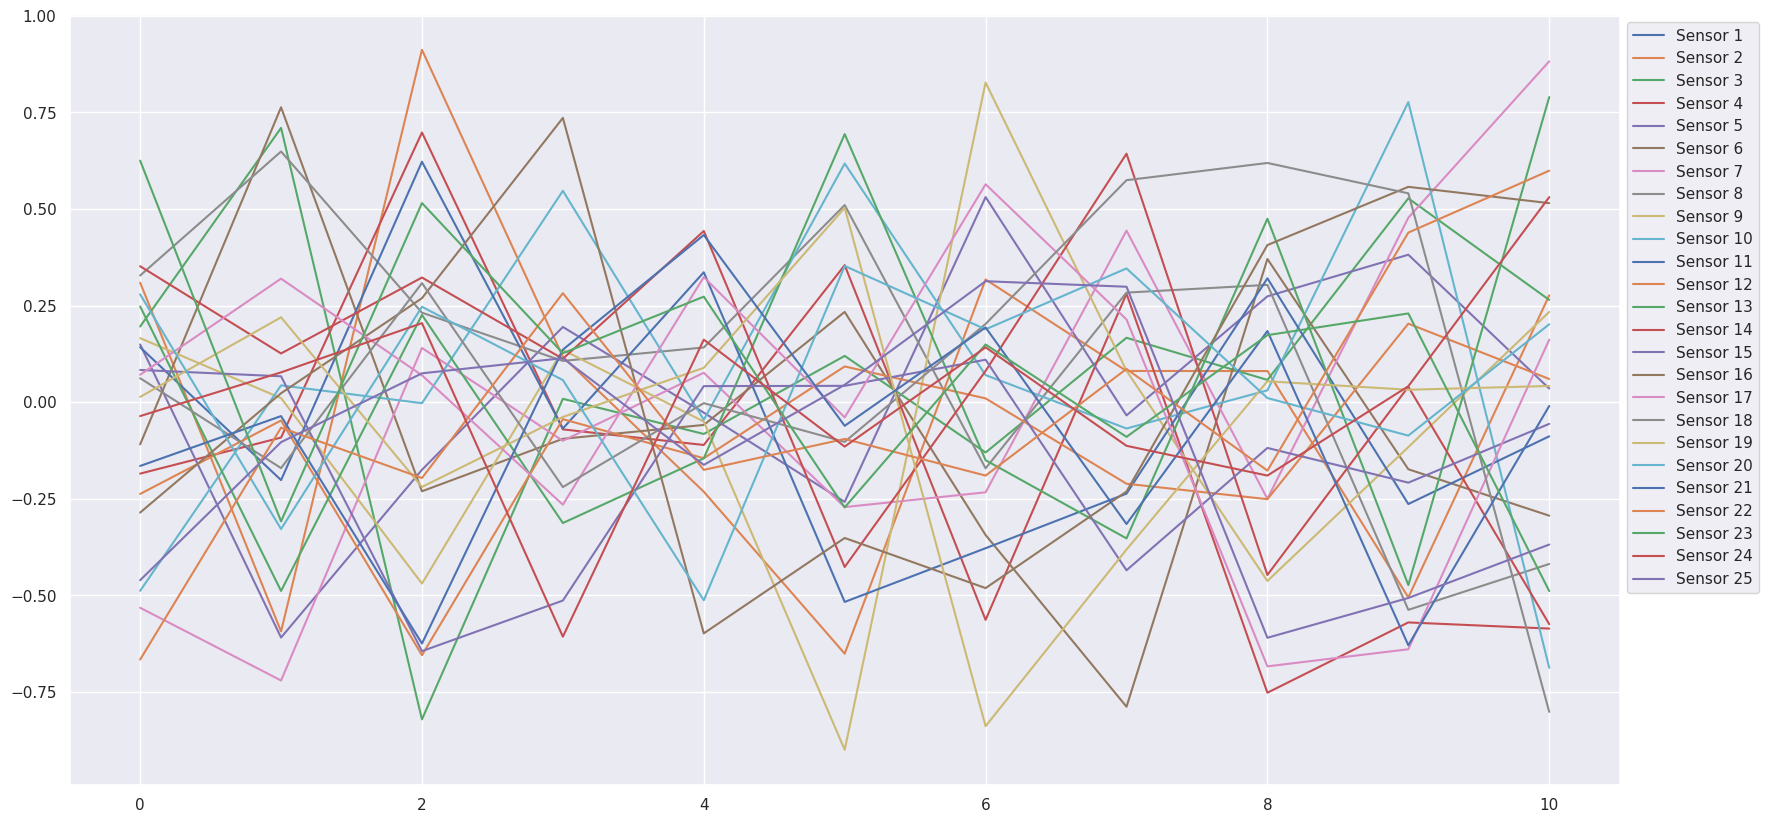

In [ ]:
l=[]
for x in range(25):
  l.append("Sensor "+str(x+1))
plt.figure(figsize=(20,10))
plt.plot(df3.iloc[:11,:])
plt.legend(l,bbox_to_anchor=(1,1))

In [ ]:
l

['Sensor 1',
 'Sensor 2',
 'Sensor 3',
 'Sensor 4',
 'Sensor 5',
 'Sensor 6',
 'Sensor 7',
 'Sensor 8',
 'Sensor 9',
 'Sensor 10',
 'Sensor 11',
 'Sensor 12',
 'Sensor 13',
 'Sensor 14',
 'Sensor 15',
 'Sensor 16',
 'Sensor 17',
 'Sensor 18',
 'Sensor 19',
 'Sensor 20',
 'Sensor 21',
 'Sensor 22',
 'Sensor 23',
 'Sensor 24',
 'Sensor 25']

In [ ]:
df.head(12)

0     1       2       3       4       5       6       7       8       9   \
0   0.0   1.0  0.4337  0.7431  0.9390  0.7541  0.9035  0.7943  0.2622  0.5901   
1   0.0   2.0  0.7859  0.1925  0.9024  0.8108  0.2016  0.9649  0.2445  0.8934   
2   0.0   3.0  0.0512  0.9633  0.1423  0.8404  0.6654  0.4348  0.5751  0.8067   
3   0.0   4.0  0.0413  0.1588  0.1675  0.0971  0.2918  0.1970  0.0971  0.2039   
4   0.0   5.0  0.7042  0.4724  0.3901  0.2793  0.2522  0.1933  0.2694  0.4110   
5   0.0   6.0  0.9538  0.3029  0.4227  0.7774  0.5194  0.7531  0.4816  0.9918   
6   0.0   7.0  0.6729  0.9906  0.8604  0.2969  0.8278  0.4840  0.2507  0.0795   
7   0.0   8.0  0.3945  0.4753  0.6420  0.9227  0.8885  0.1002  0.5443  0.8279   
8   0.0   9.0  0.7368  0.8174  0.8750  0.1230  0.3970  0.7676  0.5175  0.8211   
9   0.0  10.0  0.6752  0.1698  0.6974  0.1273  0.5090  0.3354  0.8128  0.2753   
10  1.0   1.0  0.4013  0.6779  0.9426  0.3566  0.3919  0.0981  0.9805  0.5617   
11  1.0   2.0  0.0451  0.9980  0.0685  0.7227  0.6657  0.2293  0.1240  0.2924   

        10      11      12      13      14      15      16      17      18  \
0   0.7558  0.2675  0.4097  0.1722  0.4200  0.7719  0.8553  0.5696  0.6407   
1   0.9039  0.9474  0.7457  0.6983  0.2097  0.3358  0.4028  0.4259  0.7456   
2   0.3372  0.3346  0.9570  0.3021  0.5279  0.8505  0.2061  0.4753  0.5449   
3   0.3392  0.8863  0.8181  0.7741  0.4613  0.5736  0.0601  0.7959  0.5306   
4   0.3608  0.3153  0.6516  0.5065  0.3612  0.8042  0.8458  0.2474  0.5711   
5   0.0920  0.7097  0.1927  0.2852  0.9791  0.5525  0.5948  0.2433  0.2040   
6   0.9068  0.9769  0.5989  0.6087  0.4585  0.5395  0.6494  0.1682  0.7322   
7   0.9093  0.8412  0.6045  0.3934  0.0408  0.6840  0.2489  0.0176  0.2317   
8   0.3583  0.3890  0.7096  0.4585  0.9334  0.4863  0.3679  0.7746  0.0908   
9   0.1591  0.9358  0.6722  0.8755  0.4021  0.4421  0.2338  0.7912  0.1517   
10  0.7954  0.1078  0.0195  0.0796  0.8694  0.2948  0.2387  0.7539  0.9158   
11  0.1719  0.4293  0.6843  0.2187  0.4098  0.1948  0.0142  0.5176  0.1631   

        19      20      21      22      23      24      25      26  
0   0.7027  0.7163  0.9954  0.8303  0.1641  0.7893  0.7533  0.2925  
1   0.5750  0.7947  0.4663  0.4303  0.3643  0.0558  0.1330  0.0295  
2   0.8531  0.6337  0.8807  0.2560  0.0597  0.5751  0.7797  0.8544  
3   0.3109  0.2726  0.3298  0.4658  0.7479  0.8747  0.2677  0.3816  
4   0.5686  0.6575  0.1447  0.5774  0.4022  0.6753  0.8371  0.6748  
5   0.1013  0.6044  0.9570  0.8958  0.8006  0.5282  0.4132  0.4582  
6   0.9347  0.0961  0.2847  0.4782  0.2882  0.4375  0.5795  0.8926  
7   0.8063  0.4249  0.7711  0.4558  0.5419  0.4521  0.3392  0.6380  
8   0.7100  0.7641  0.7748  0.9589  0.7818  0.9553  0.7653  0.1555  
9   0.6923  0.7245  0.6380  0.0089  0.4479  0.6776  0.7189  0.2121  
10  0.1142  0.1561  0.3578  0.3480  0.9472  0.4583  0.9891  0.6206  
11  0.0425  0.3357  0.4578  0.2300  0.0897  0.3224  0.3442  0.2458

In [ ]:
nparray=np.array(df.iloc[:,2:])
l=[]
for i in range(50000):
  l.extend(nparray[0+i*10:10+i*10].T)

In [ ]:
dft=pd.DataFrame(l)

In [ ]:
dft

0       1       2       3       4       5       6       7  \
0        0.4337  0.7859  0.0512  0.0413  0.7042  0.9538  0.6729  0.3945   
1        0.7431  0.1925  0.9633  0.1588  0.4724  0.3029  0.9906  0.4753   
2        0.9390  0.9024  0.1423  0.1675  0.3901  0.4227  0.8604  0.6420   
3        0.7541  0.8108  0.8404  0.0971  0.2793  0.7774  0.2969  0.9227   
4        0.9035  0.2016  0.6654  0.2918  0.2522  0.5194  0.8278  0.8885   
...         ...     ...     ...     ...     ...     ...     ...     ...   
1249995  0.1563  0.1233  0.3714  0.4365  0.7906  0.9287  0.7473  0.0866   
1249996  0.6530  0.9781  0.1872  0.4631  0.6329  0.3918  0.1093  0.2817   
1249997  0.3092  0.7130  0.6858  0.6054  0.3362  0.2143  0.3094  0.4906   
1249998  0.8449  0.2936  0.1443  0.8123  0.4943  0.8486  0.7807  0.7756   
1249999  0.1271  0.5804  0.1283  0.2251  0.0779  0.3380  0.7287  0.5428   

              8       9  
0        0.7368  0.6752  
1        0.8174  0.1698  
2        0.8750  0.6974  
3        0.1230  0.1273  
4        0.3970  0.5090  
...         ...     ...  
1249995  0.2696  0.0270  
1249996  0.5609  0.7201  
1249997  0.6706  0.4489  
1249998  0.1297  0.4848  
1249999  0.8826  0.5125  

[1250000 rows x 10 columns]

<Axes: >

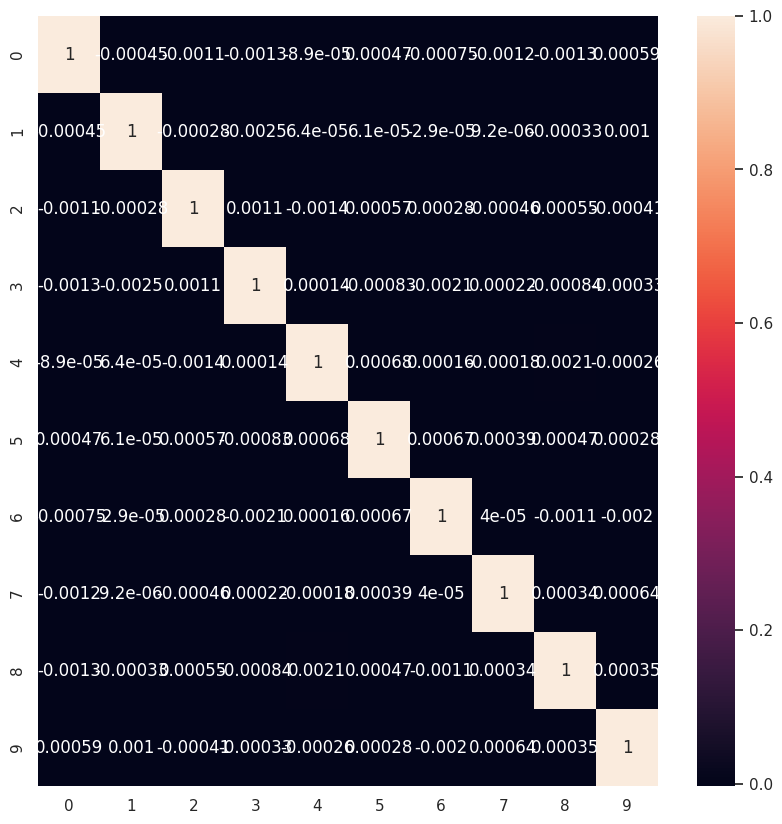

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data=dft.corr(),annot=True)

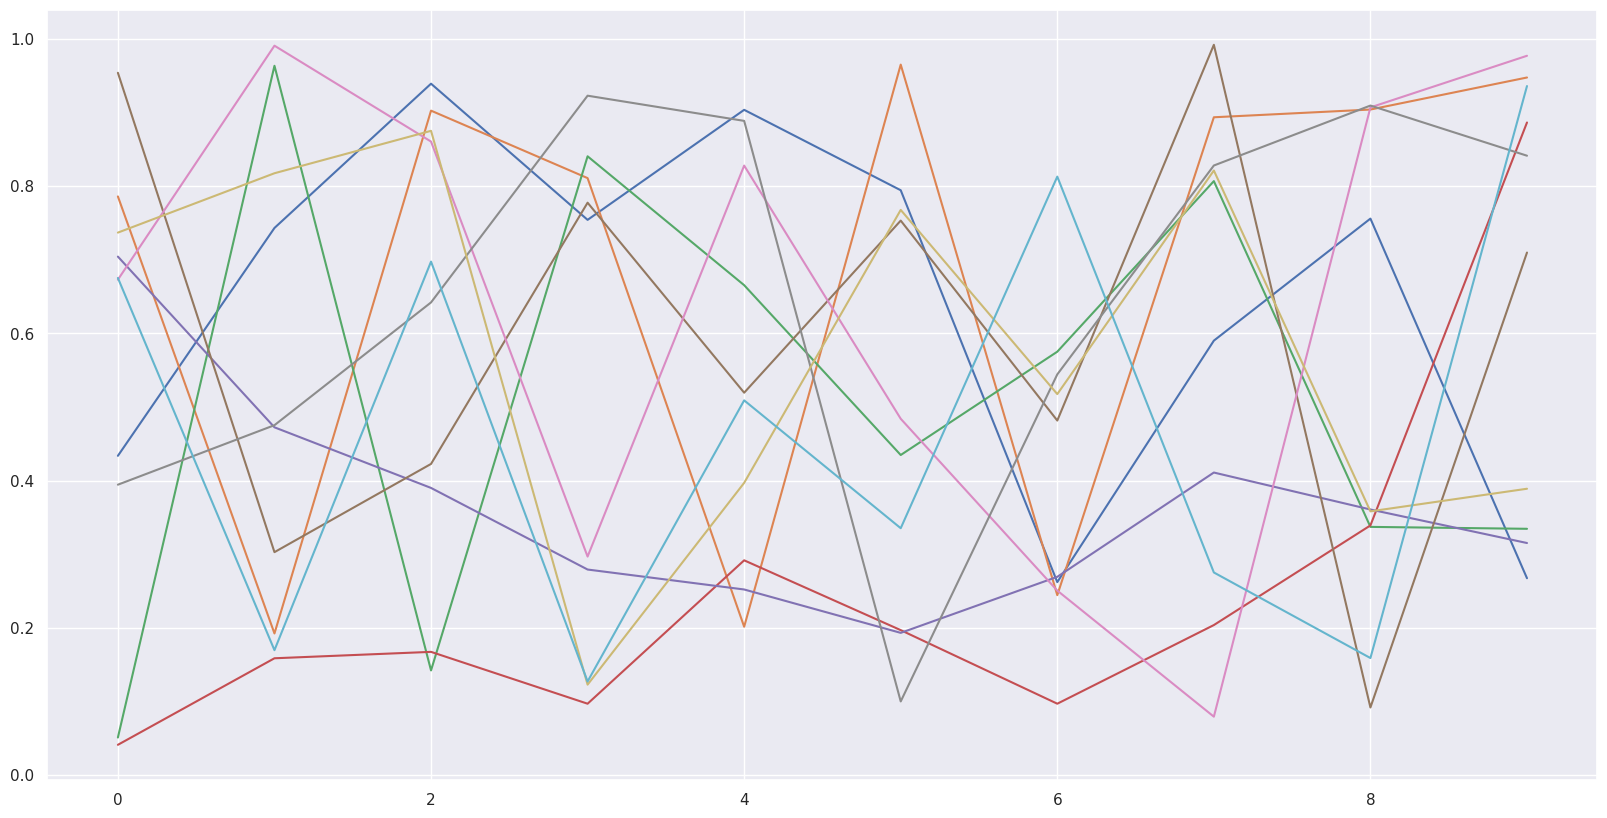

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(dft[:10])

In [ ]:
df4=dft.diff(axis=1,periods=1)

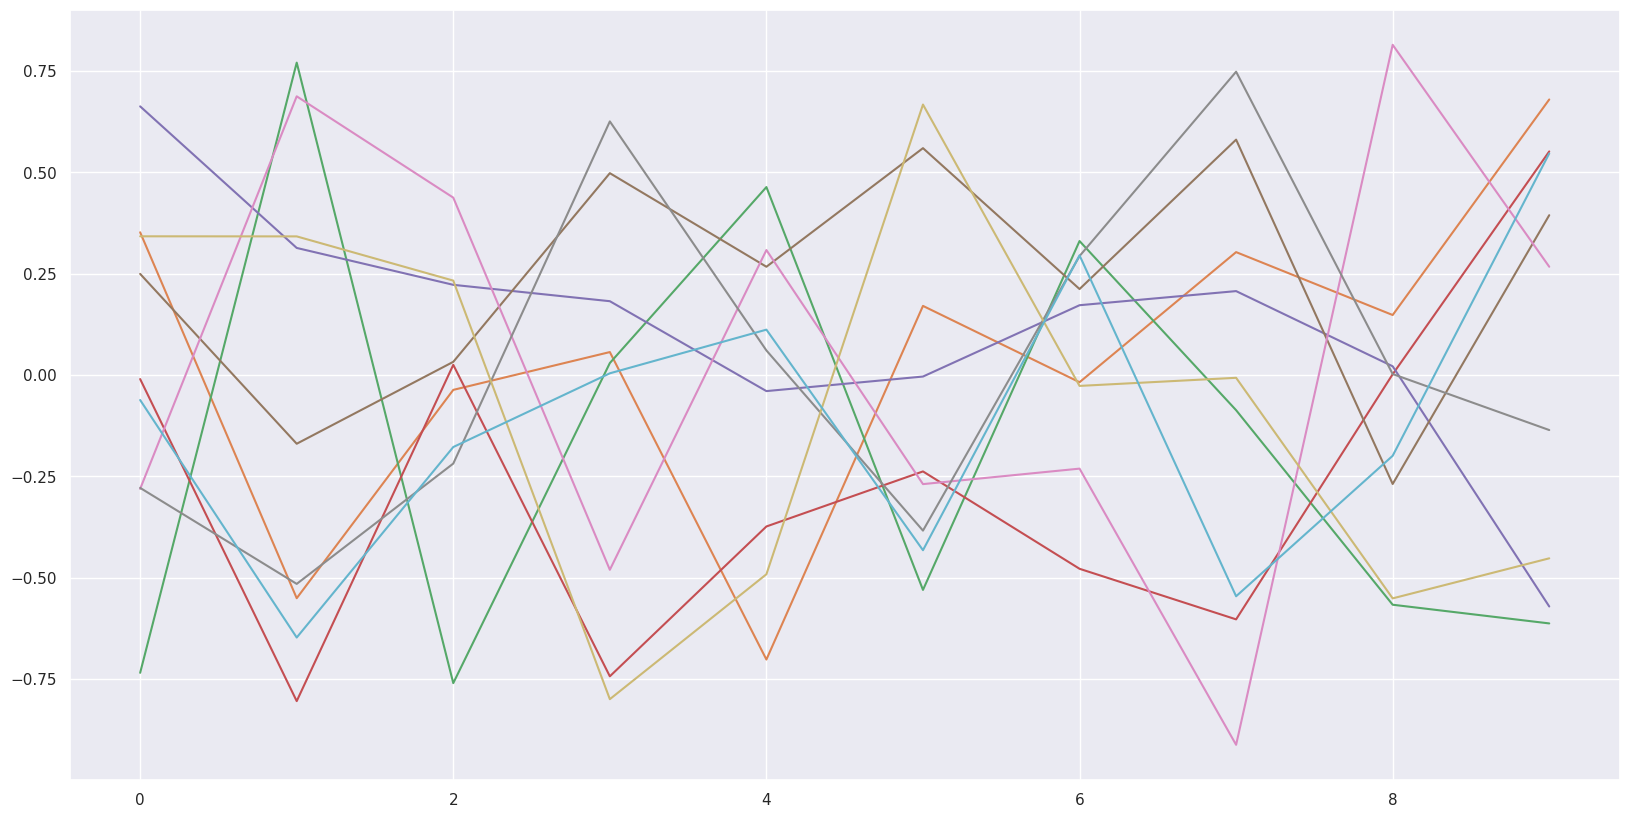

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(df4[:10])

In [ ]:
dfo0=dfu.loc[dfu.Labels==0]
dfo0=dfo0.iloc[:,1:]
dfo1=dfu.loc[dfu.Labels==1]
dfo1=dfo1.iloc[:,1:]
dfo2=dfu.loc[dfu.Labels==2]
dfo2=dfo2.iloc[:,1:]
dfo3=dfu.loc[dfu.Labels==3]
dfo3=dfo3.iloc[:,1:]

In [ ]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [ ]:
x=dfu.iloc[:,1:-1]
y=dfu.iloc[:,-1]

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 250 entries, x_1 to x_250
dtypes: float64(250)
memory usage: 95.4 MB


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [ ]:
model = Sequential()
model.add(Conv1D(100,kernel_size=250,activation="relu", input_shape=(250,1)))
model.add(keras.layers.Flatten())
model.add(Dense(4, activation='softmax'))

model.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
              optimizer=keras.optimizers.SGD(),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1, 100)            25100     
                                                                 
 flatten (Flatten)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 4)                 404       
                                                                 
Total params: 25,504
Trainable params: 25,504
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train,y_train,epochs=20)
pred = model.predict(x_test)
predict_classes = np.argmax(pred,axis=1)
# print("Predicted classes: {}",predict_classes)
# print("Expected classes: {}",predict_classes)

Epoch 1/20
1407/1407 [==============================] - 14s 3ms/step - loss: 1.3800 - accuracy: 0.2827
Epoch 2/20
1407/1407 [==============================] - 4s 3ms/step - loss: 1.3738 - accuracy: 0.2956
Epoch 3/20
1407/1407 [==============================] - 4s 3ms/step - loss: 1.3679 - accuracy: 0.3059
Epoch 4/20
1407/1407 [==============================] - 4s 3ms/step - loss: 1.3620 - accuracy: 0.3140
Epoch 5/20
1407/1407 [==============================] - 5s 4ms/step - loss: 1.3570 - accuracy: 0.3200
Epoch 6/20
1407/1407 [==============================] - 4s 3ms/step - loss: 1.3531 - accuracy: 0.3231
Epoch 7/20
1407/1407 [==============================] - 4s 3ms/step - loss: 1.3495 - accuracy: 0.3302
Epoch 8/20
1407/1407 [==============================] - 4s 3ms/step - loss: 1.3455 - accuracy: 0.3335
Epoch 9/20
1407/1407 [==============================] - 4s 3ms/step - loss: 1.3415 - accuracy: 0.3390
Epoch 10/20
1407/1407 [==============================] - 4s 3ms/step - loss: 1.33

In [ ]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import CuDNNLSTM, Dense, Dropout, LSTM
from keras.optimizers import Adam

In [ ]:
#Initializing the classifier Network
classifier = Sequential()

#Adding the input LSTM network layer
classifier.add(LSTM(128, input_shape=(250,1), return_sequences=True))
classifier.add(Dropout(0.2))

#Adding a second LSTM network layer
classifier.add(LSTM(128))

#Adding a dense hidden layer
classifier.add(Dense(64, activation='relu'))
classifier.add(Dropout(0.2))

#Adding the output layer
classifier.add(Dense(4, activation='softmax'))

#Compiling the network
classifier.compile( loss='sparse_categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001, decay=1e-6),
              metrics=['accuracy'] )

In [ ]:
#Fitting the data to the model
classifier.fit(x_train,y_train,epochs=100,validation_data=(x_test, y_test))

Epoch 1/100
1407/1407 [==============================] - 31s 20ms/step - loss: 1.3559 - accuracy: 0.3138 - val_loss: 1.2833 - val_accuracy: 0.3832
Epoch 2/100
1407/1407 [==============================] - 29s 21ms/step - loss: 1.1947 - accuracy: 0.4371 - val_loss: 1.1197 - val_accuracy: 0.4772
Epoch 3/100
1407/1407 [==============================] - 27s 19ms/step - loss: 1.0293 - accuracy: 0.5287 - val_loss: 0.9190 - val_accuracy: 0.5818
Epoch 4/100
1407/1407 [==============================] - 27s 19ms/step - loss: 0.9222 - accuracy: 0.5824 - val_loss: 0.8930 - val_accuracy: 0.6020
Epoch 5/100
1407/1407 [==============================] - 27s 19ms/step - loss: 0.8874 - accuracy: 0.6036 - val_loss: 0.8580 - val_accuracy: 0.6138
Epoch 6/100
1407/1407 [==============================] - 28s 20ms/step - loss: 0.8622 - accuracy: 0.6130 - val_loss: 0.8122 - val_accuracy: 0.6410
Epoch 7/100
1407/1407 [==============================] - 26s 19ms/step - loss: 0.8474 - accuracy: 0.6236 - val_loss: 0

In [ ]:
classifier.save('/saved_models/my_model')